# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : [bigquery-public-data.ml_datasets.credit_card_default](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=abiding-state-376306&ws=!1m10!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m4!1m3!1sabiding-state-376306!2sbquxjob_57a98eb9_186c59b9f78!3sUS)

Objective : Membuat model *Classification* untuk memprediksi `default_payment_next_month` dengan menggunakan algoritma *Logistic Regression, SVM, Decision Tree, Random Forest, KNN* dan *Naive Bayes* dengan dataset yang sudah disimpan sesuai instruksi dari [Milestone 1](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-m1-andik-alfauzi)

# **2 - Query SQL**

Bagian ini menunjukan cara mendapatkan dataset dari Google Big Query dengan menggunakan query sql 

In [1]:
# Query SQL to get Data from Google Big Query

# SELECT 
#       limit_balance,
#       CAST(sex AS INT64) AS sex,
#       CAST(education_level AS INT64) as education_level,
#       CAST(marital_status AS INT64) as marital_status,
#       age, pay_0, pay_2, pay_3, pay_4,
#       CAST(pay_5 AS FLOAT64) as pay_5,
#       CAST(pay_6 AS FLOAT64) as pay_6,
#       bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, 
#       pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 
#       CAST(default_payment_next_month as INT64) default_payment_next_month
# FROM `bigquery-public-data.ml_datasets.credit_card_default`
# LIMIT 35820

In [2]:
# Limit data sesuai instruksi
batch = 18
tahunLahir = 1990
limitData = batch * tahunLahir
print('Limit data yang seharusnya digunakan : ', limitData)

Limit data yang seharusnya digunakan :  35820


# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [3]:
# Installing library
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 6.4 MB/s eta 0:00:00


In [4]:
# Importing libraries
import pandas as pd
import numpy as np

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from feature_engine.outliers import Winsorizer

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [5]:
# Read data csv from big query
data = pd.read_csv('/content/drive/MyDrive/Haktiv8/Data Science/FTDS---Phase-1/Milestone/h8dsft_P1M1_Andik_Al_Fauzi/h8dsft_P1M1_Andik_Al_Fauzi.csv')

# Copy dataset to make sure the original is untoucable
copyData = data.copy()

# Display dataset
copyData

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0


Limit data yang seharusnya saya gunakan ada sebanyak **35,820** tapi didataset hanya ada **2,965** dataset, jadi saya akan menggunakan semua dataset

# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [6]:
# Check banyak data
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Dataset terdiri dari 24 kolom dan 2965 baris data dan data di kolom `sex, education_level, marital_status, pay_5, pay_6, default_payment_next_month` sudah sesuai instruksi yang di konversi menjadi data numerical

In [7]:
# Check data describe
copyData.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


nilai rata-rata dari `limit_balance` ada di angka `140,000` dengan rata-rata `age` di angka `34` dan yang tertua diangka `69`

In [8]:
# Check limit_balance berdasarkan gender
copyData.groupby(copyData['sex'])['limit_balance'].sum()

sex
1    184830000
2    299560000
Name: limit_balance, dtype: int64

`limit_balance` `sex` kode 1 memiliki jumlah yang lebih rendah dibanding dengan `limit_balance` `sex` kode 2 dengan jumlah `184,830,000` berbanding `299,560,000`

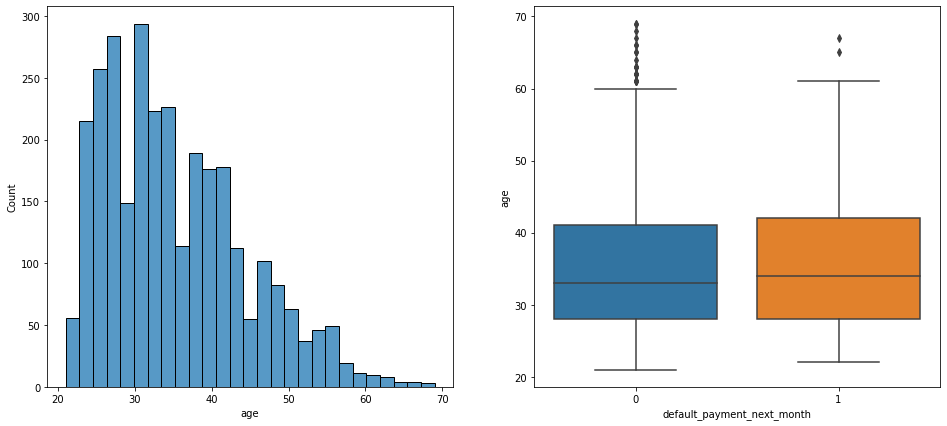

Max - Age :  35.19325463743676
Skewness default_payment_next_month 1.39419870948517


In [9]:
# Visualisasi data di kolom Age
plt.figure(figsize=(16, 7))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=copyData)

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='default_payment_next_month', y='age', data=copyData)
plt.show()

print('Max - Age : ', copyData.age.mean())
print('Skewness default_payment_next_month', copyData.default_payment_next_month.skew())

Berikut persebaran data `age` dengan rata-rata `35` dan untuk nilai skewness dari `default_payment_next_month` adalah **1.39419870948517** dengan cenderung *Right Extreme Skewness*

<AxesSubplot:xlabel='pay_6', ylabel='count'>

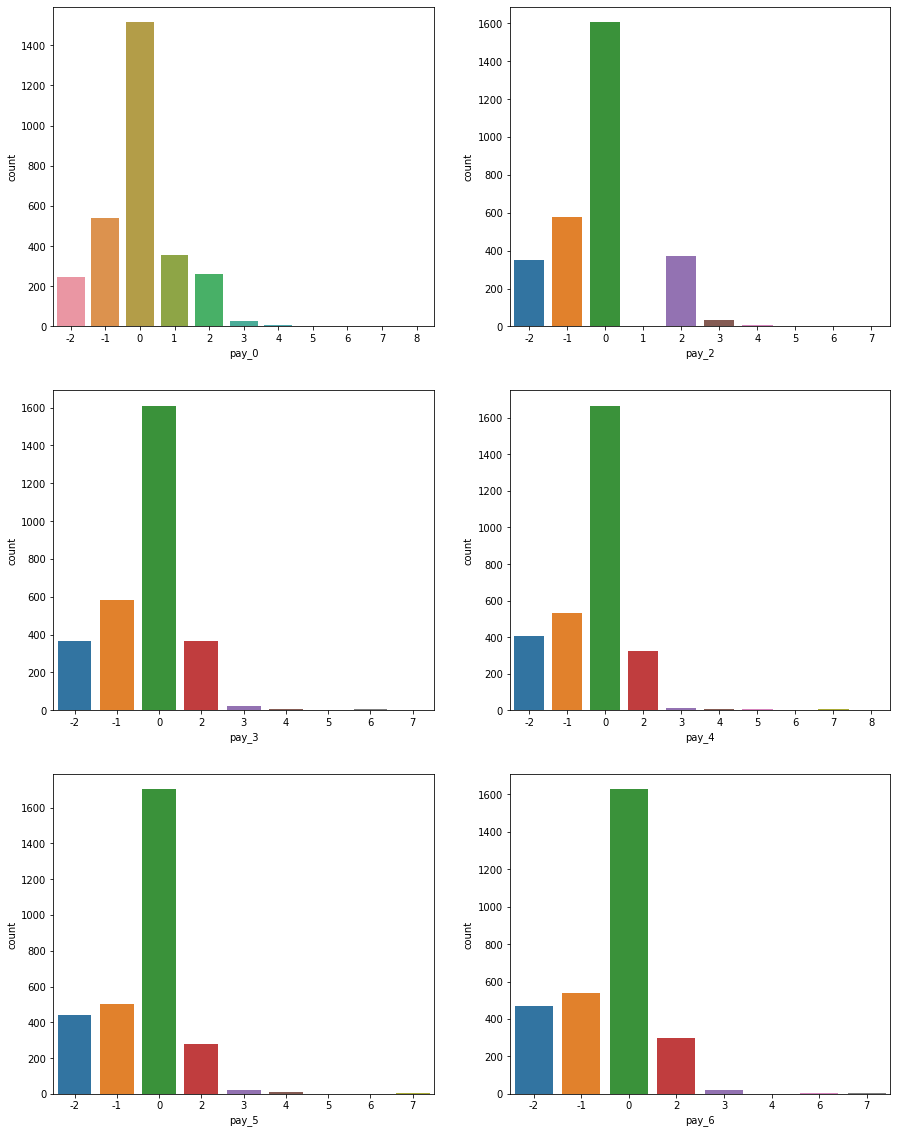

In [10]:
# Define function visualization for column pay_0 sampai pay_6
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
sns.countplot(x = copyData.pay_0)

plt.subplot(3, 2, 2)
sns.countplot(x = copyData.pay_2)

plt.subplot(3, 2, 3)
sns.countplot(x = copyData.pay_3)

plt.subplot(3, 2, 4)
sns.countplot(x = copyData.pay_4)

plt.subplot(3, 2, 5)
sns.countplot(x = copyData.pay_5)

plt.subplot(3, 2, 6)
sns.countplot(x = copyData.pay_6)

Dari visualisasi diatas dapat diartikan bahwa untuk kode 0 dapat diartikan bahwa para user membayar tepat waktu dilihat dari graphik yang menyatakan bahwa kode 0 memiliki banyak data untuk masing-masing data dari column `pay_0` sampai `pay_6` walaupun ada data juga di masing-masing kolom dengan kode 2 yang mungkin menyatakan bahwa ada pelanggan telat bayar.

Mean Bill Amount 1 :  52118.30522765598
Mean Bill Amount 2 :  50649.15311973019
Mean Bill Amount 3 :  48239.75750421585
Mean Bill Amount 4 :  44089.683305227656
Mean Bill Amount 5 :  40956.08060708263
Mean Bill Amount 6 :  39773.07251264755


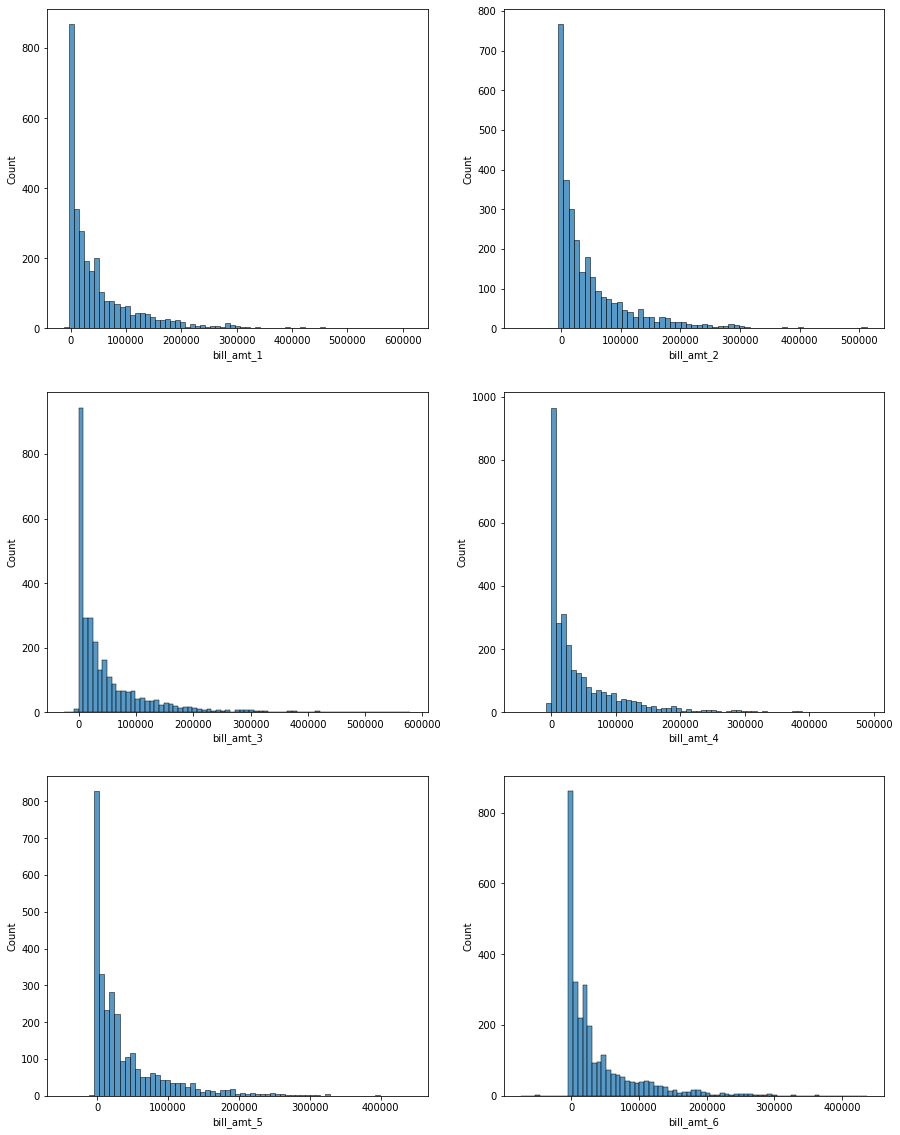

In [11]:
# Define function visualization for column bill_amt_1 sampai bill_amt_6
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
sns.histplot(x = copyData.bill_amt_1)

plt.subplot(3, 2, 2)
sns.histplot(x = copyData.bill_amt_2)

plt.subplot(3, 2, 3)
sns.histplot(x = copyData.bill_amt_3)

plt.subplot(3, 2, 4)
sns.histplot(x = copyData.bill_amt_4)

plt.subplot(3, 2, 5)
sns.histplot(x = copyData.bill_amt_5)

plt.subplot(3, 2, 6)
sns.histplot(x = copyData.bill_amt_6)

# Check mean
print('Mean Bill Amount 1 : ', copyData.bill_amt_1.mean())
print('Mean Bill Amount 2 : ', copyData.bill_amt_2.mean())
print('Mean Bill Amount 3 : ', copyData.bill_amt_3.mean())
print('Mean Bill Amount 4 : ', copyData.bill_amt_4.mean())
print('Mean Bill Amount 5 : ', copyData.bill_amt_5.mean())
print('Mean Bill Amount 6 : ', copyData.bill_amt_6.mean())

bill_amt saya asumsikan jumlah tagihan pelanggan. Jika dilihat dari data-data diatas banyak terdapat pelanggan yang tidak memiliki tagihan pada masing-masing kolom di `bill_amt_1` sampai `bill_amt_6`, karena kemungkinan berkaitan dengan ketaatan para user dalam membayar tagihannya. Dan dengan rata-rata tagihan tertinggi ada di `bill_amt_1` dengan nilai rata-ratanya **52,118.31**

Total Pay Amount 1 :  18824497
Total Pay Amount 2 :  18597946
Total Pay Amount 3 :  15271224
Total Pay Amount 4 :  13524480
Total Pay Amount 5 :  14567895
Total Pay Amount 6 :  15959710


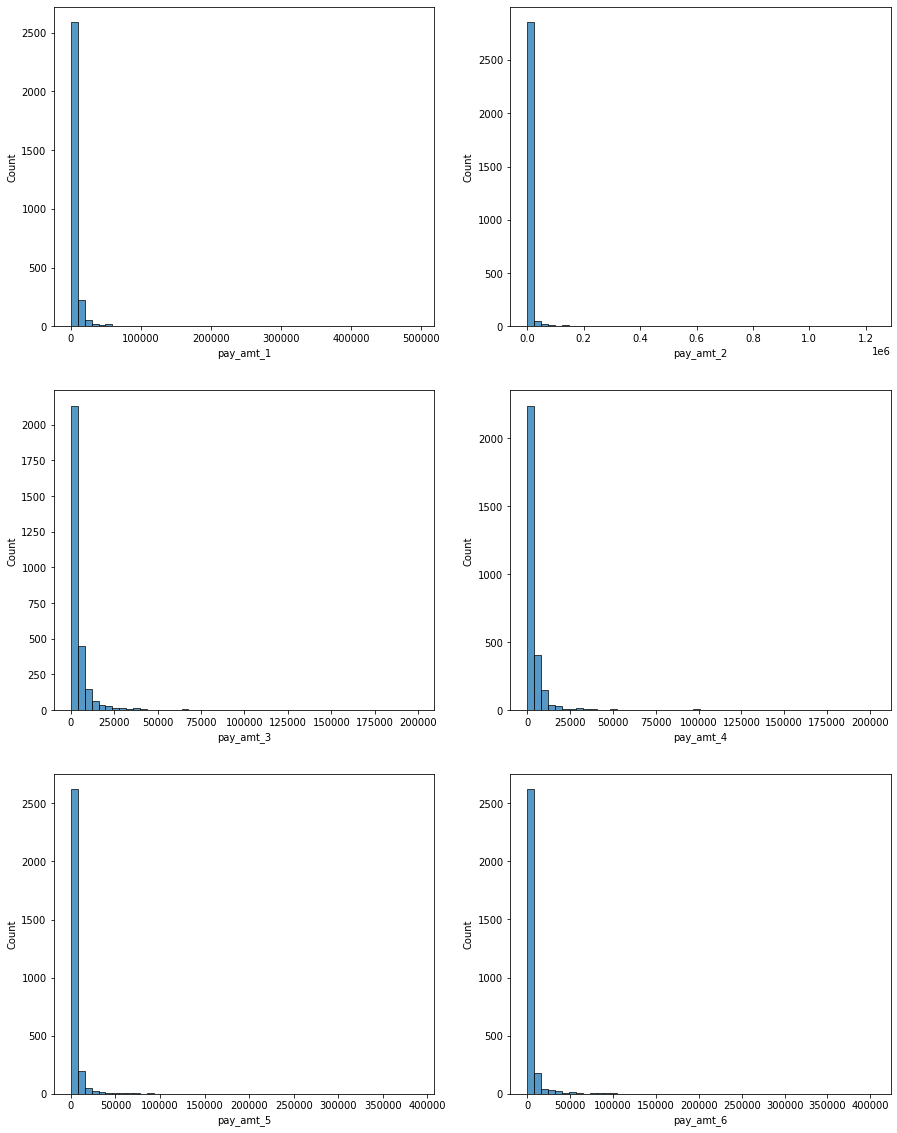

In [12]:
# Define function visualization for column pay_amt_1 sampai pay_amt_6
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)
sns.histplot(x = copyData.pay_amt_1, bins=50)

plt.subplot(3, 2, 2)
sns.histplot(x = copyData.pay_amt_2, bins=50)

plt.subplot(3, 2, 3)
sns.histplot(x = copyData.pay_amt_3, bins=50)

plt.subplot(3, 2, 4)
sns.histplot(x = copyData.pay_amt_4, bins=50)

plt.subplot(3, 2, 5)
sns.histplot(x = copyData.pay_amt_5, bins=50)

plt.subplot(3, 2, 6)
sns.histplot(x = copyData.pay_amt_6, bins=50)

# Check mean
print('Total Pay Amount 1 : ', copyData.pay_amt_1.sum())
print('Total Pay Amount 2 : ', copyData.pay_amt_2.sum())
print('Total Pay Amount 3 : ', copyData.pay_amt_3.sum())
print('Total Pay Amount 4 : ', copyData.pay_amt_4.sum())
print('Total Pay Amount 5 : ', copyData.pay_amt_5.sum())
print('Total Pay Amount 6 : ', copyData.pay_amt_6.sum())

kolom pay_amt saya asumsikan jumlah bayar pelanggan terhadap tagihan. Total tertinggi pay_amt terdapat pada `pay_amt_1` dengan total sebanyak **18,824,497** dan terendah pada `pay_amt_4` dengan total **13,524,480**

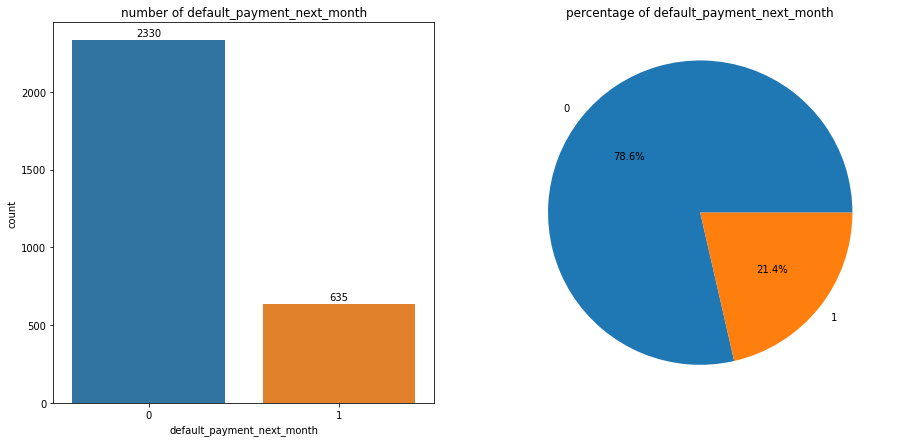

In [13]:
# # Visualisasi data kolom default_payment_next_month
# # Histogram
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
fig = sns.countplot(x = 'default_payment_next_month',data=copyData)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 25, '{:1.0f}'.format(height), ha="center")
plt.title('number of default_payment_next_month')

# Pie chart
plt.subplot(1,2,2)
plt.pie(data.default_payment_next_month.value_counts(), labels= data.default_payment_next_month.value_counts().index, autopct = '%1.1f%%')
plt.title('percentage of default_payment_next_month')
plt.show()

dari visualisasi diatas dapat dijabarkan jika `sex` dengan kode 1 memiliki data terbanyak dibanding dengan `sex` kode 2 dengan perbandingan sebesar **78.6%** berbanding **21.4%**

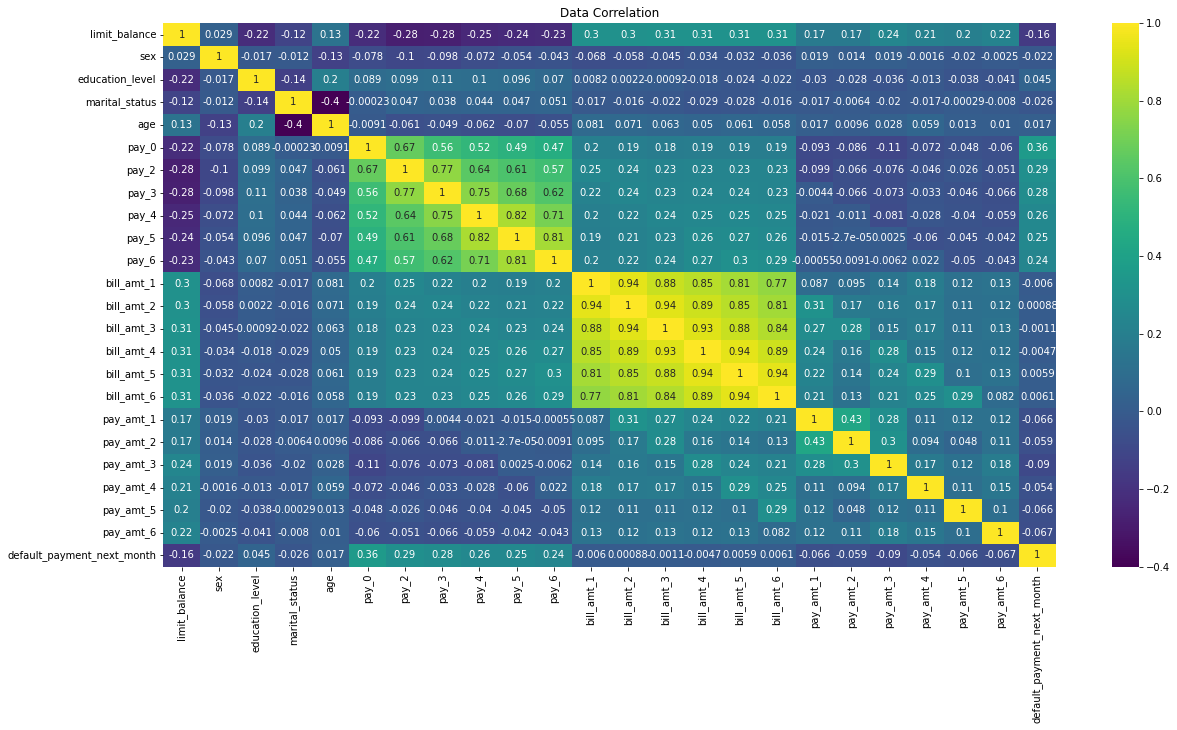

In [14]:
# Cek korelasi
plt.figure(figsize = (20, 10))
sns.heatmap(copyData.corr(), annot=True, cmap='viridis')
plt.title('Data Correlation')
plt.show()

dari visualisasi diatas data di kolom dataset saling memiliki korelasi

In [15]:
# Check data type
catCol = copyData.select_dtypes(include=['object']).columns.to_list()
numCol = copyData.select_dtypes(include=np.number).columns.to_list()

# print data categorical
print('Data Categorical : ')
print('='*30)
for i in catCol:
  print(i)
  print(copyData[i].value_counts())
  print('='*30)

# print data numerical
print('Data Numerical : ')
print('='*30)
for x in numCol:
  print(x)
  print(copyData[x].value_counts())
  print('='*30)

Data Categorical : 
Data Numerical : 
limit_balance
50000     348
20000     203
200000    150
30000     148
80000     145
100000    123
150000    122
180000     97
210000     84
140000     83
120000     80
360000     78
70000      76
90000      71
260000     70
130000     69
60000      68
230000     68
300000     67
160000     62
500000     56
240000     56
110000     54
170000     52
280000     50
10000      46
220000     43
290000     37
320000     32
250000     28
310000     28
40000      26
400000     25
350000     24
420000     20
270000     19
390000     16
330000     16
380000     16
340000     15
190000     12
410000     12
450000      9
460000      8
490000      8
370000      8
470000      7
440000      6
480000      5
430000      5
510000      4
530000      3
560000      1
680000      1
700000      1
800000      1
780000      1
750000      1
620000      1
Name: limit_balance, dtype: int64
sex
2    1802
1    1163
Name: sex, dtype: int64
education_level
2    1400
1    1039
3   

Dapat dilihat dari deskripsi diatas bahwa data-data sudah berkategori numerical, walaupun memang data `sex`, `educational_level`, `marital_status` dan `default_payment_next_month` merupakan data categorical yang sudah di encoding menjadi numerical

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 *Split data between X (Features) and y (Target)*

In [16]:
dfTrainAll, dfTest = train_test_split(copyData, test_size=0.1, random_state=19, stratify=copyData.default_payment_next_month)
dfTrain, dfVal = train_test_split(dfTrainAll, test_size=0.2, random_state=19, stratify=dfTrainAll.default_payment_next_month)

print(f'Data Train      :  {len(dfTrain) / len(copyData):.1f}')
print(f'Data Validation :  {len(dfVal) / len(copyData):.1f}')
print(f'Data Test       :  {len(dfTest) / len(copyData):.1f}')

Data Train      :  0.7
Data Validation :  0.2
Data Test       :  0.1


data berhasil di split antara data Train, data Validation dan data test dengan proporsi 70% data Train, 20% data Validasi dan 10% data Test

In [17]:
# # Split data between X (Features) and y (Target)
X_train = dfTrain.drop(columns=['default_payment_next_month'])
y_train = dfTrain['default_payment_next_month']

X_test = dfVal.drop(columns=['default_payment_next_month'])
y_test = dfVal['default_payment_next_month']

## 6.2 *Missing Value Handling*

In [18]:
# Check missing value di data fitur
print('Missing Value data Fitur : ')
print(X_train.isnull().sum())

# Check missing value di data target
print('\nMissing Value data Target : ')
print(y_train.isnull().sum())

Missing Value data Fitur : 
limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

Missing Value data Target : 
0


Tidak ada *missing value* di data fitur ataupun target

## 6.3 *Outlier Handling*

Pada bagan ini saya akan menghandle outlier dengan metode capping

In [19]:
# Function Visualization
def diagnosticPlots(df, variable):
  plt.figure(figsize=(16, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram '+variable)

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(y = df[variable])
  plt.title('Boxplot '+variable)

  plt.show()

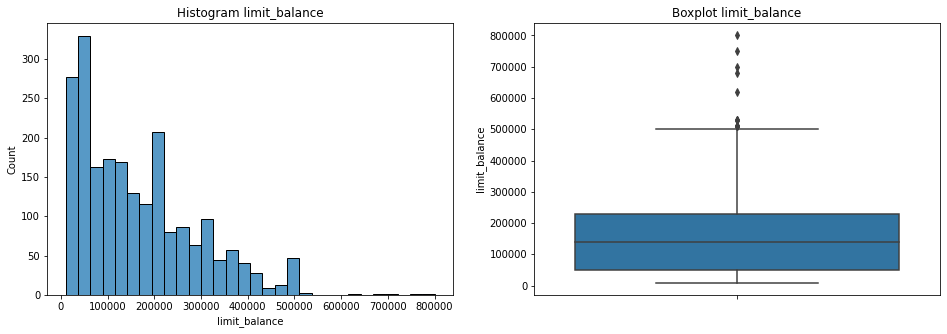

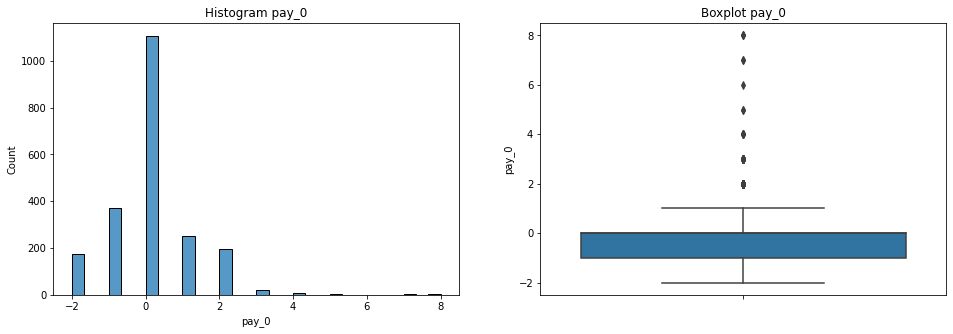

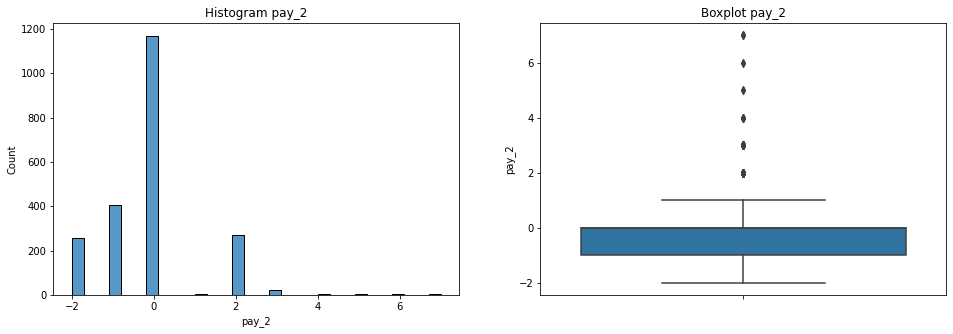

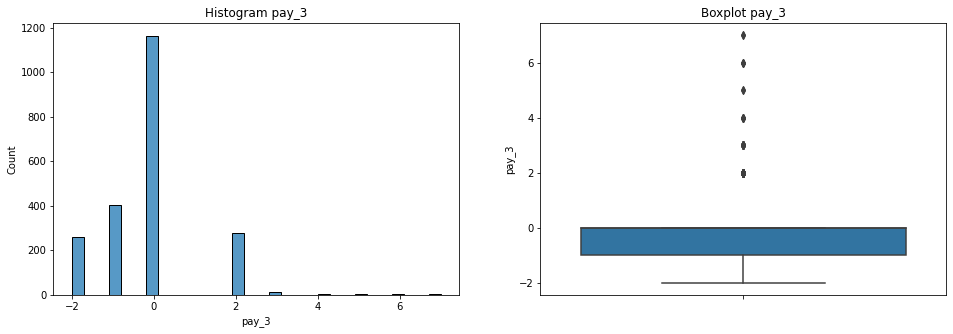

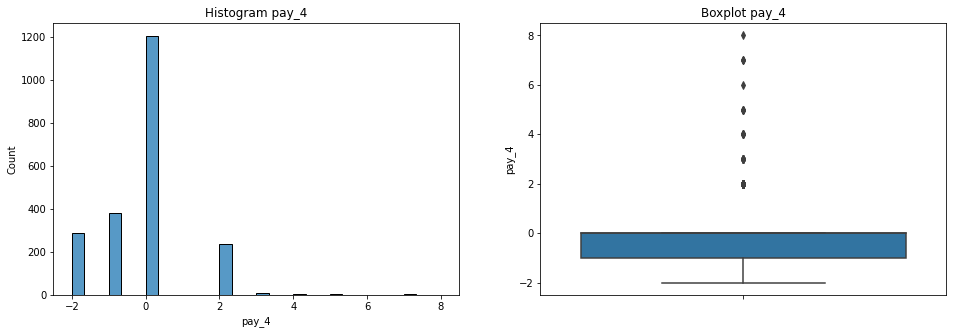

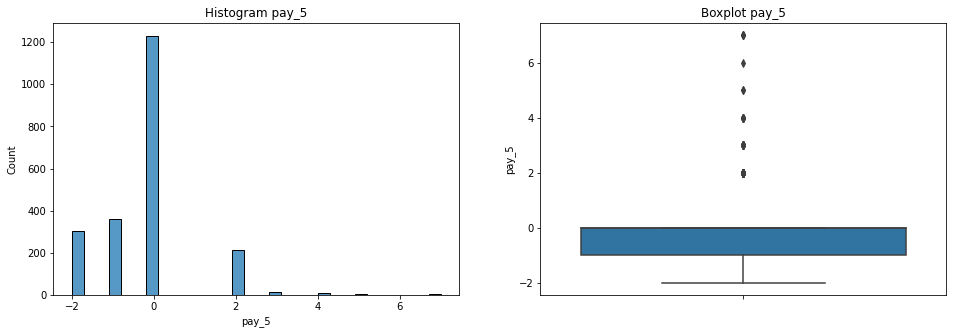

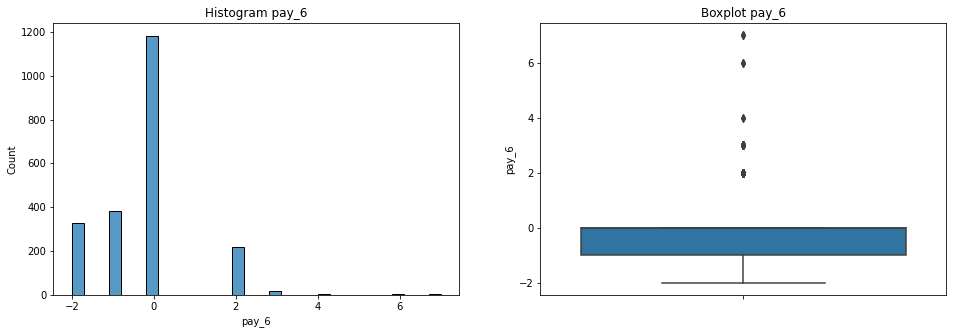

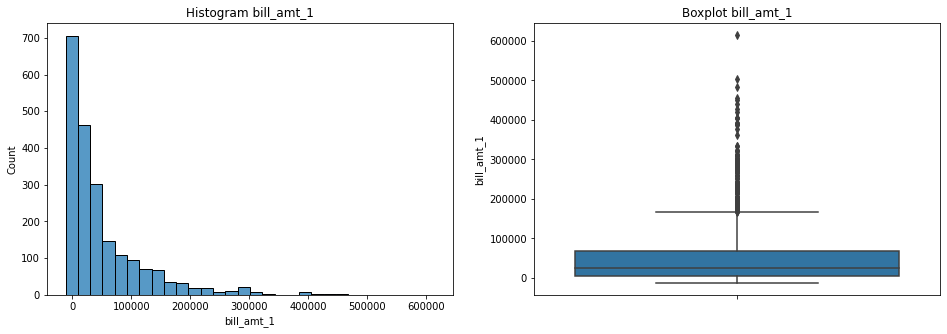

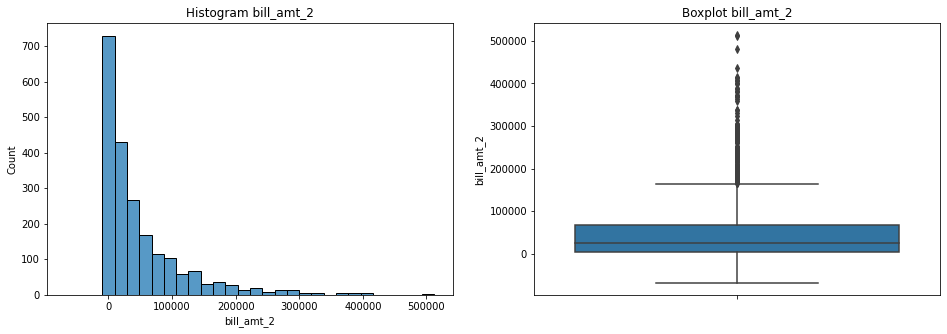

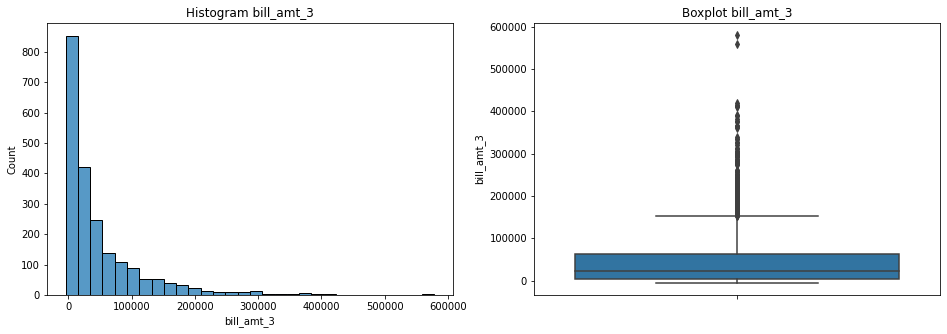

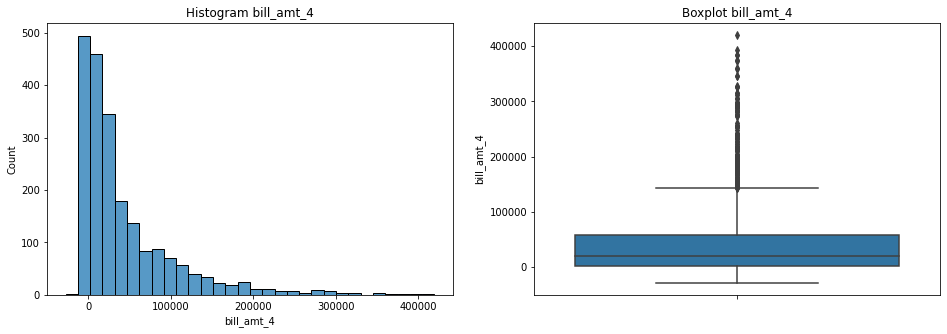

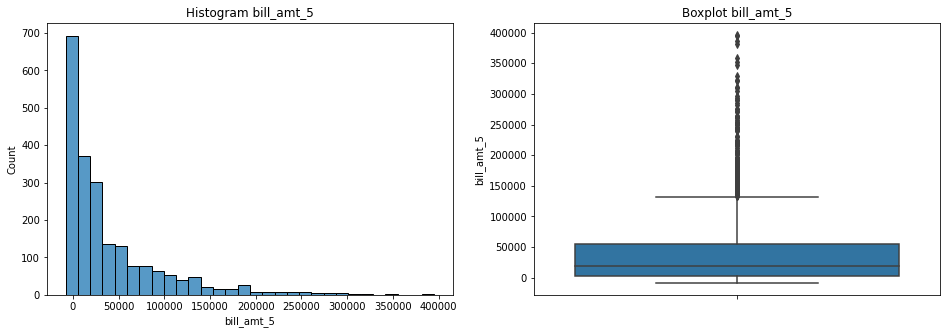

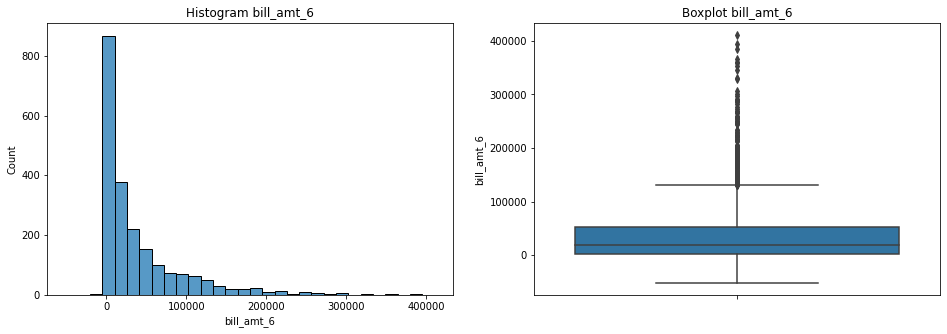

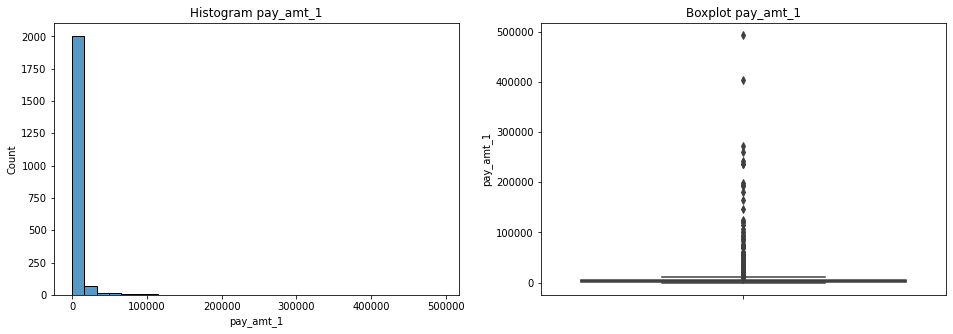

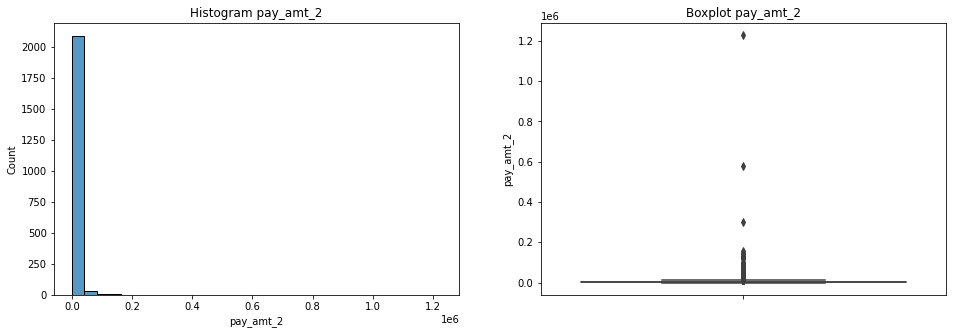

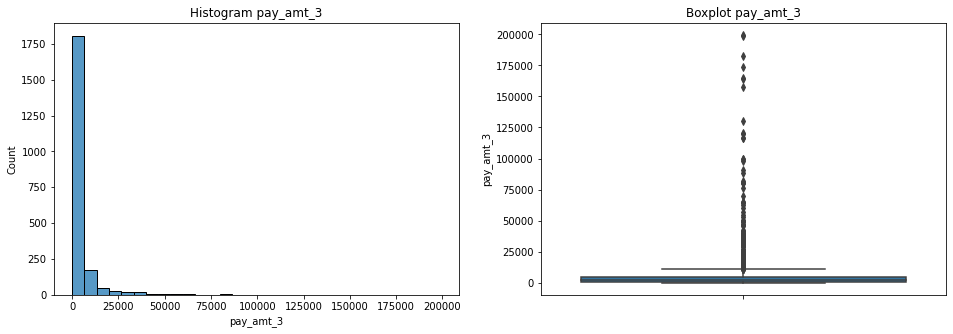

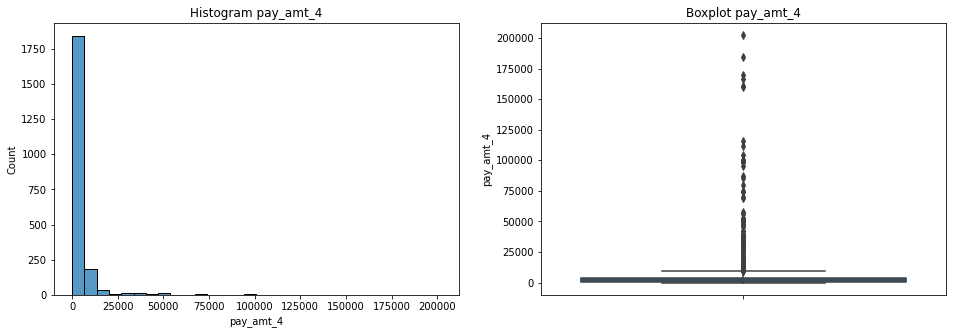

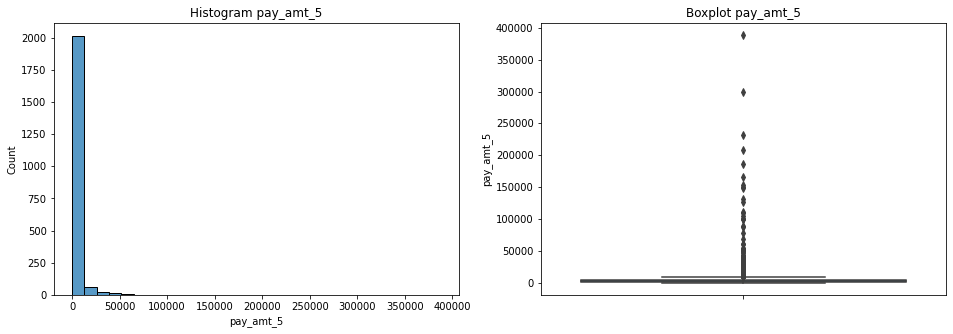

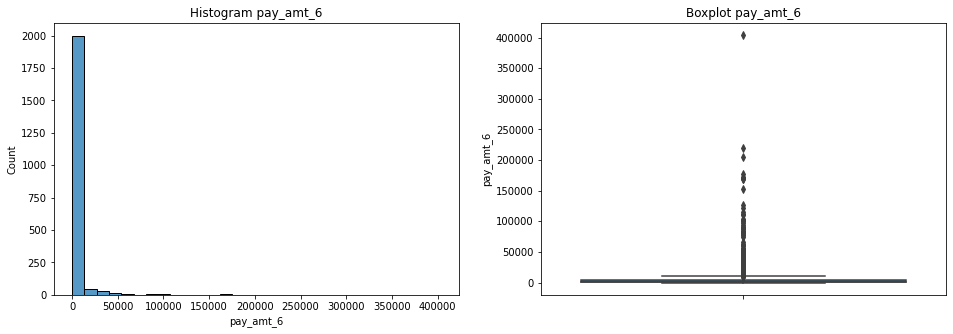



Skewness Value limit_balance :  1.0046037415641746
Skewness Value pay_0         :  1.091647679238808
Skewness Value pay_2         :  0.9442217981996696
Skewness Value pay_3         :  0.9331760419308806
Skewness Value pay_4         :  1.0827203141708874
Skewness Value pay_5         :  1.0107442805027733
Skewness Value pay_6         :  0.9195226859473954
Skewness Value bill_amt_1    :  2.481386933382194
Skewness Value bill_amt_1    :  2.481386933382194
Skewness Value bill_amt_3    :  2.52843482880313
Skewness Value bill_amt_4    :  2.3281841211505263
Skewness Value bill_amt_5    :  2.328997049180505
Skewness Value bill_amt_6    :  2.383431167625769
Skewness Value pay_amt_1     :  11.466435221161227
Skewness Value pay_amt_2     :  28.389205899642636
Skewness Value pay_amt_3     :  7.83004843366497
Skewness Value pay_amt_4     :  8.348346734052974
Skewness Value pay_amt_5     :  11.84192301601413
Skewness Value pay_amt_6     :  9.790578503738459


In [20]:
# Histogram and Boxplot visualization for outlier
diagnosticPlots(X_train, 'limit_balance')
diagnosticPlots(X_train, 'pay_0')
diagnosticPlots(X_train, 'pay_2')
diagnosticPlots(X_train, 'pay_3')
diagnosticPlots(X_train, 'pay_4')
diagnosticPlots(X_train, 'pay_5')
diagnosticPlots(X_train, 'pay_6')
diagnosticPlots(X_train, 'bill_amt_1')
diagnosticPlots(X_train, 'bill_amt_2')
diagnosticPlots(X_train, 'bill_amt_3')
diagnosticPlots(X_train, 'bill_amt_4')
diagnosticPlots(X_train, 'bill_amt_5')
diagnosticPlots(X_train, 'bill_amt_6')
diagnosticPlots(X_train, 'pay_amt_1')
diagnosticPlots(X_train, 'pay_amt_2')
diagnosticPlots(X_train, 'pay_amt_3')
diagnosticPlots(X_train, 'pay_amt_4')
diagnosticPlots(X_train, 'pay_amt_5')
diagnosticPlots(X_train, 'pay_amt_6')
print('\n')
print('='*60)
print('Skewness Value limit_balance : ', X_train.limit_balance.skew())
print('Skewness Value pay_0         : ', X_train.pay_0.skew())  
print('Skewness Value pay_2         : ', X_train.pay_2.skew())
print('Skewness Value pay_3         : ', X_train.pay_3.skew())
print('Skewness Value pay_4         : ', X_train.pay_4.skew())
print('Skewness Value pay_5         : ', X_train.pay_5.skew())
print('Skewness Value pay_6         : ', X_train.pay_6.skew())
print('Skewness Value bill_amt_1    : ', X_train.bill_amt_1.skew())
print('Skewness Value bill_amt_1    : ', X_train.bill_amt_1.skew())
print('Skewness Value bill_amt_3    : ', X_train.bill_amt_3.skew())
print('Skewness Value bill_amt_4    : ', X_train.bill_amt_4.skew())
print('Skewness Value bill_amt_5    : ', X_train.bill_amt_5.skew())
print('Skewness Value bill_amt_6    : ', X_train.bill_amt_6.skew())
print('Skewness Value pay_amt_1     : ', X_train.pay_amt_1.skew())
print('Skewness Value pay_amt_2     : ', X_train.pay_amt_2.skew())
print('Skewness Value pay_amt_3     : ', X_train.pay_amt_3.skew())
print('Skewness Value pay_amt_4     : ', X_train.pay_amt_4.skew())
print('Skewness Value pay_amt_5     : ', X_train.pay_amt_5.skew())
print('Skewness Value pay_amt_6     : ', X_train.pay_amt_6.skew())
print('='*60)

Dapat dilihat dari data diatas rata-rata untuk nilai *skewness* nya tinggi diatas nilai 0.5 dengan kecenderungan *right extreme skewness*. Dikarenakan nilai *skewness*nya diatas 0.5 maka saya akan menanganinya dengan menggunakan metode *capping*.

In [21]:
# Define capping function
winsorizer = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5, 
                        variables= ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                                    'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                                    'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

X_trainClean = winsorizer.fit_transform(X_train)

In [22]:
# Inspect capper
print('Right Tail of capper : ', winsorizer.right_tail_caps_)
print('Left Tail of capper  : ', winsorizer.left_tail_caps_)

Right Tail of capper :  {'limit_balance': 500000.0, 'pay_0': 1.5, 'pay_2': 1.5, 'pay_3': 1.5, 'pay_4': 1.5, 'pay_5': 1.5, 'pay_6': 1.5, 'bill_amt_1': 167258.5, 'bill_amt_2': 164987.0, 'bill_amt_3': 153346.75, 'bill_amt_4': 143306.25, 'bill_amt_5': 132703.5, 'bill_amt_6': 130519.25, 'pay_amt_1': 11442.375, 'pay_amt_2': 11049.375, 'pay_amt_3': 10646.875, 'pay_amt_4': 9575.5, 'pay_amt_5': 9469.25, 'pay_amt_6': 10141.25}
Left Tail of capper  :  {'limit_balance': -220000.0, 'pay_0': -2.5, 'pay_2': -2.5, 'pay_3': -2.5, 'pay_4': -2.5, 'pay_5': -2.5, 'pay_6': -2.5, 'bill_amt_1': -93641.5, 'bill_amt_2': -93307.0, 'bill_amt_3': -86289.25, 'bill_amt_4': -81383.75, 'bill_amt_5': -75994.5, 'bill_amt_6': -75878.75, 'pay_amt_1': -5206.625, 'pay_amt_2': -5029.625, 'pay_amt_3': -5588.125, 'pay_amt_4': -5238.5, 'pay_amt_5': -5080.75, 'pay_amt_6': -5924.75}


Berikut nilai outlier dari masing-masing kolom, untuk right tail maka jika nilai di kolom itu lebih dari nilai di right tail maka akan dianggap outlier, dan sebaliknya jika ada nilai lebih dari nilai left tail maka akan dianggap outlier.

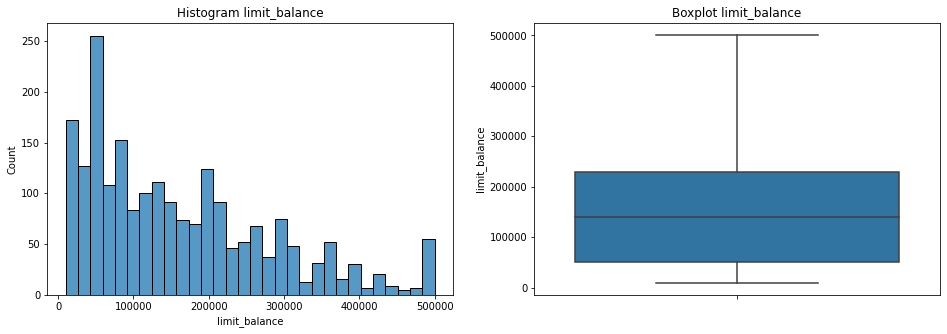

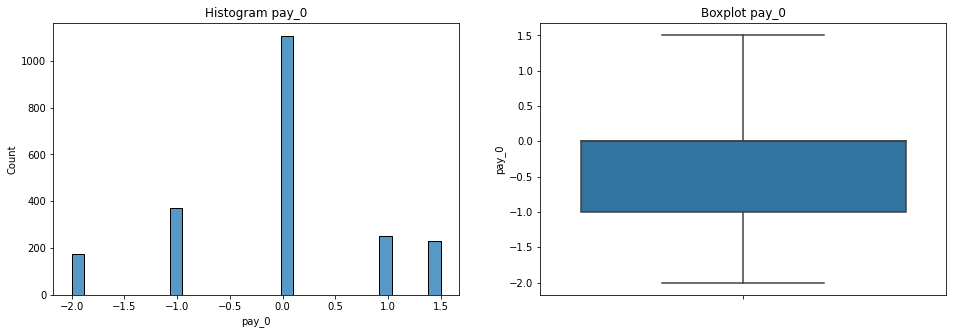

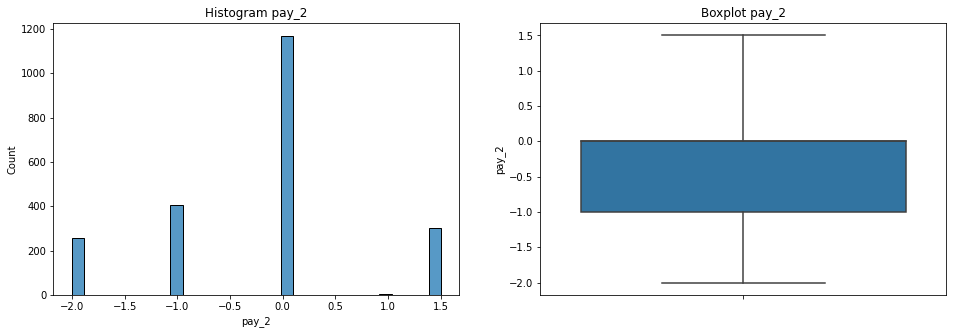

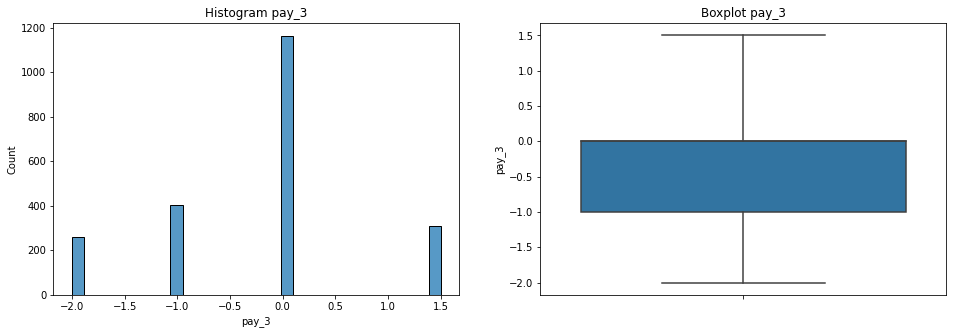

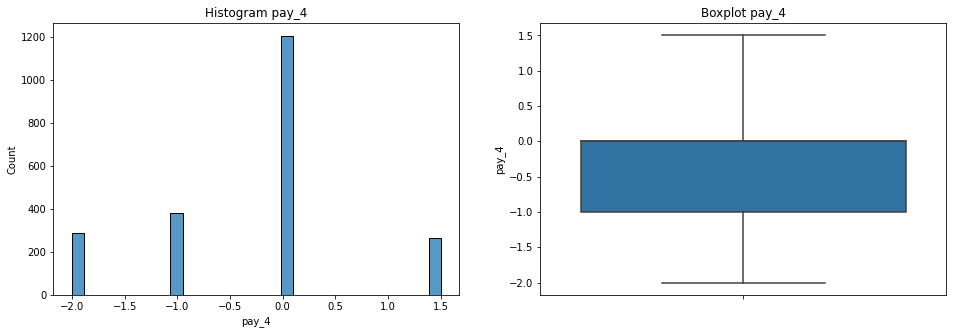

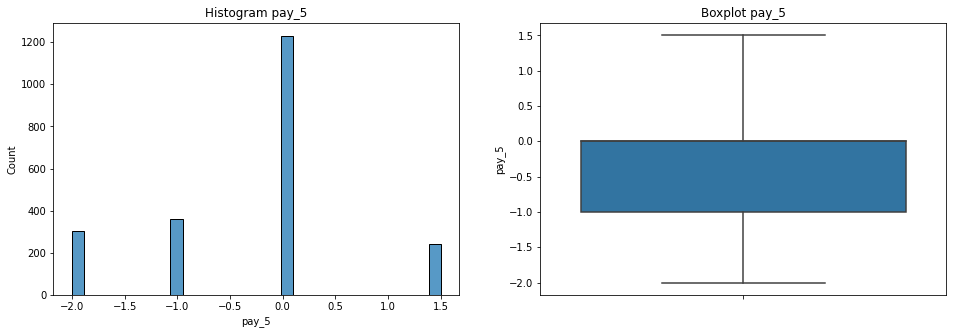

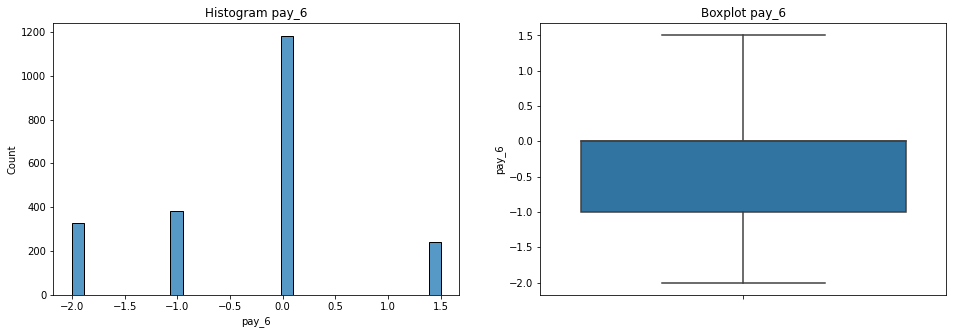

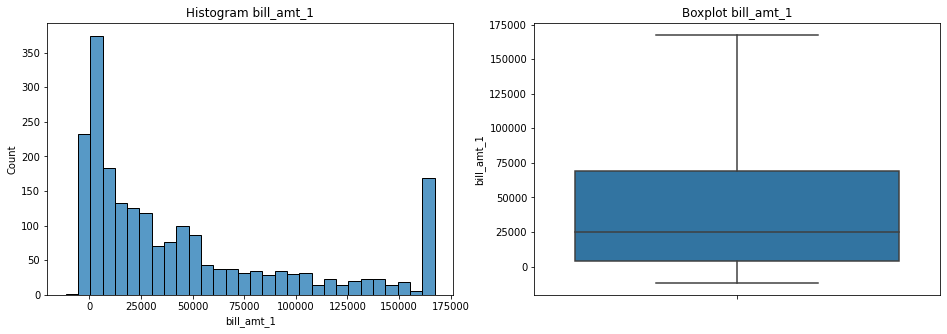

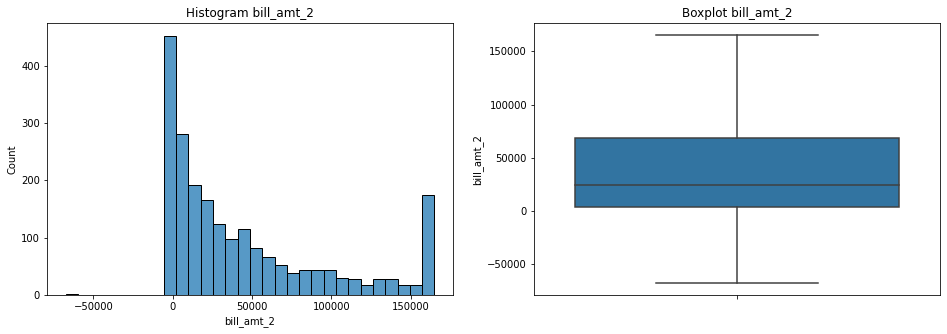

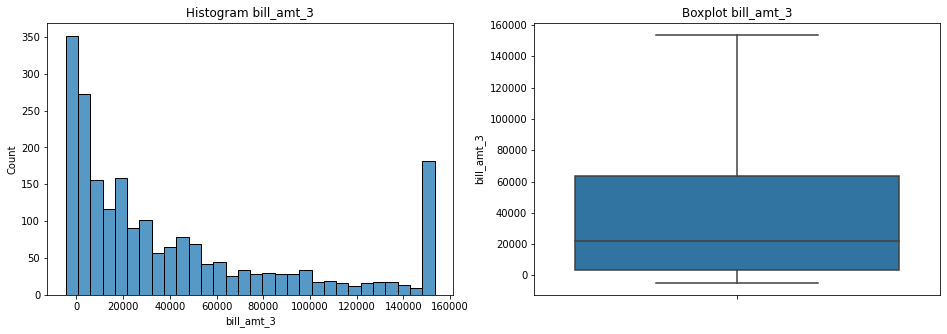

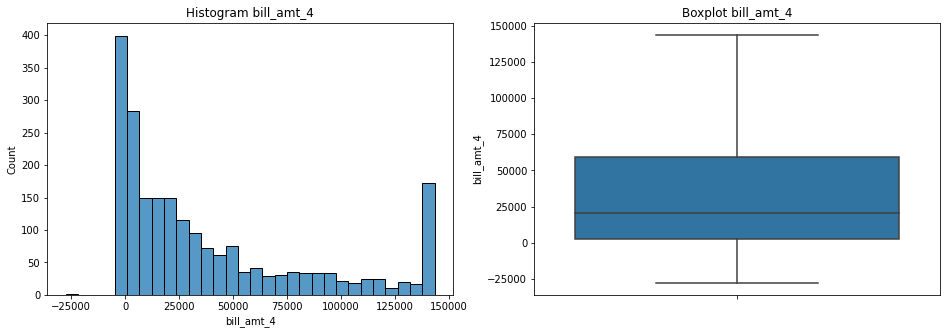

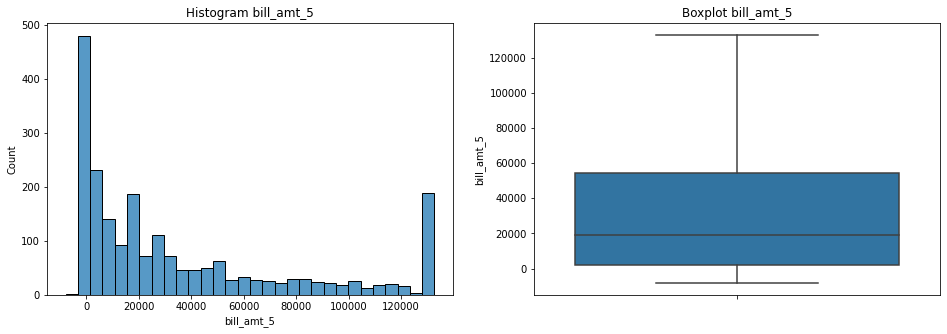

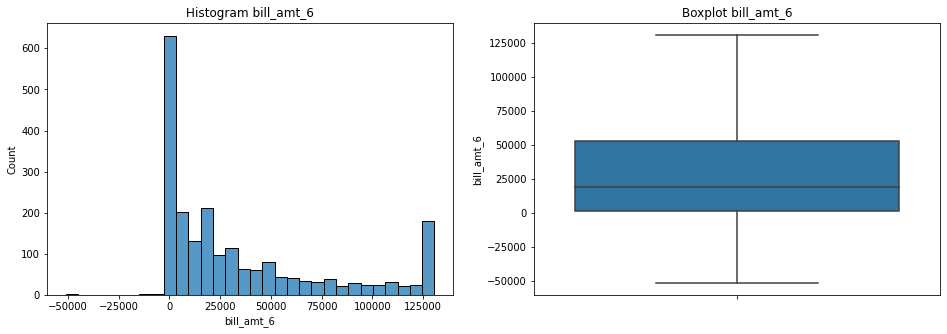

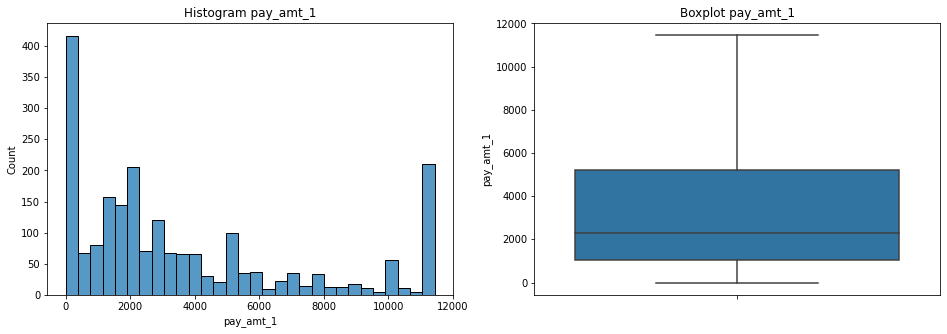

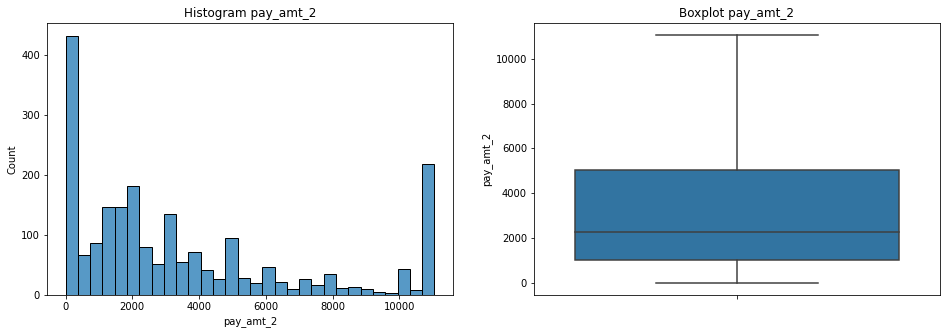

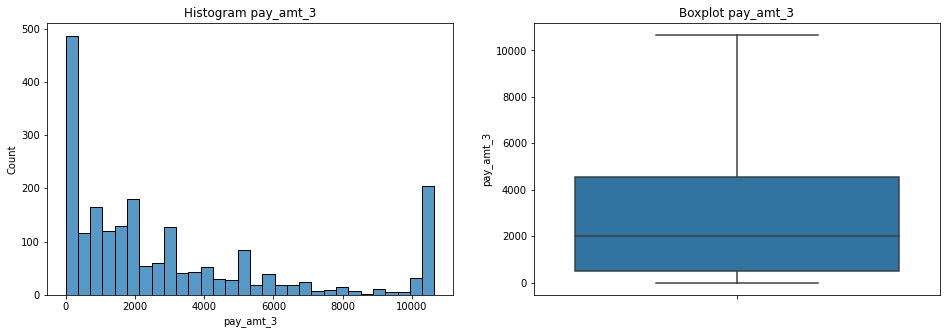

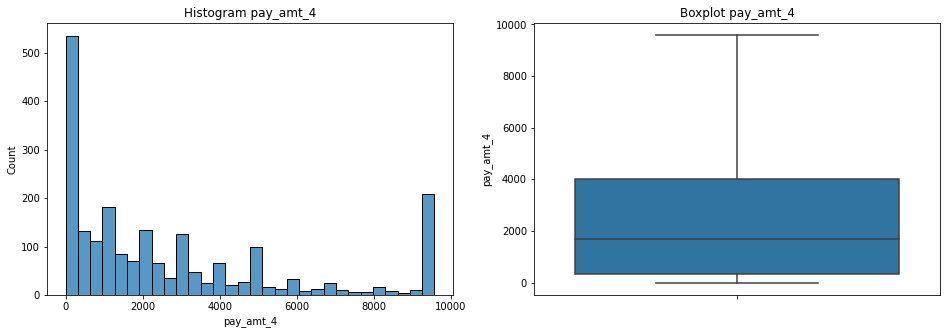

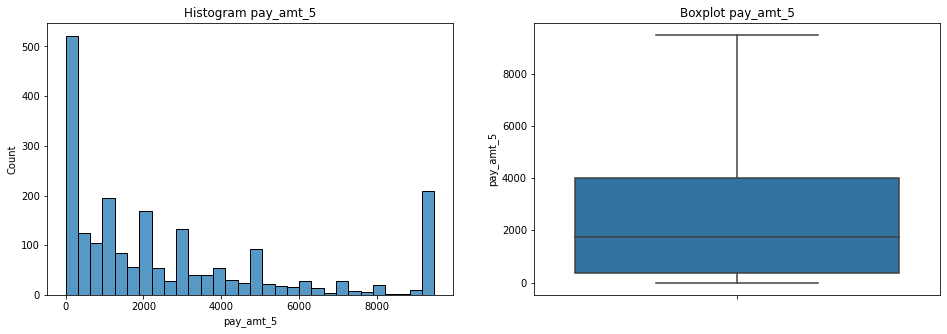

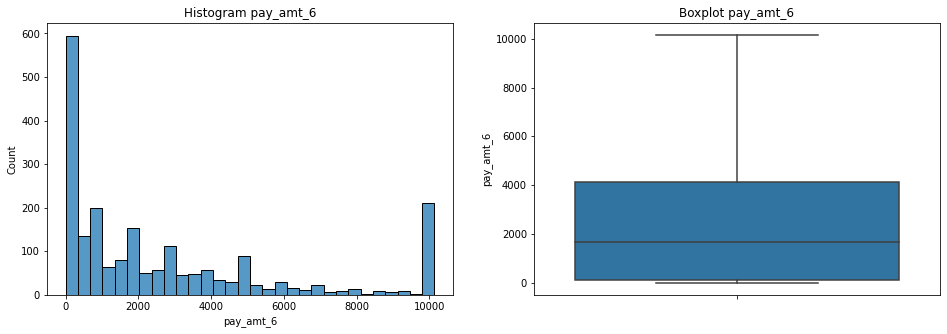

In [23]:
# Histogram and Boxplot visualization after capping
diagnosticPlots(X_trainClean, 'limit_balance')
diagnosticPlots(X_trainClean, 'pay_0')
diagnosticPlots(X_trainClean, 'pay_2')
diagnosticPlots(X_trainClean, 'pay_3')
diagnosticPlots(X_trainClean, 'pay_4')
diagnosticPlots(X_trainClean, 'pay_5')
diagnosticPlots(X_trainClean, 'pay_6')
diagnosticPlots(X_trainClean, 'bill_amt_1')
diagnosticPlots(X_trainClean, 'bill_amt_2')
diagnosticPlots(X_trainClean, 'bill_amt_3')
diagnosticPlots(X_trainClean, 'bill_amt_4')
diagnosticPlots(X_trainClean, 'bill_amt_5')
diagnosticPlots(X_trainClean, 'bill_amt_6')
diagnosticPlots(X_trainClean, 'pay_amt_1')
diagnosticPlots(X_trainClean, 'pay_amt_2')
diagnosticPlots(X_trainClean, 'pay_amt_3')
diagnosticPlots(X_trainClean, 'pay_amt_4')
diagnosticPlots(X_trainClean, 'pay_amt_5')
diagnosticPlots(X_trainClean, 'pay_amt_6')

*Outlier* sudah ditangani dengan capping

## 6.4 *Feature Selection*

In [24]:
# Display data train
X_trainClean

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
51,200000.0,1,1,2,37,0.0,0.0,0.0,0.0,0.0,...,134110.0,139209.0,132703.5,130519.25,11442.375,11049.375,10646.875,5014.0,9469.25,10141.25
2335,360000.0,2,2,1,51,1.0,-2.0,-1.0,-1.0,-1.0,...,390.0,540.0,540.0,390.00,0.000,780.000,540.000,540.0,390.00,390.00
1947,200000.0,2,1,2,34,1.0,-2.0,-2.0,-1.0,1.5,...,0.0,347.0,197.0,2917.00,0.000,0.000,347.000,0.0,2720.00,0.00
188,150000.0,2,1,2,32,0.0,0.0,0.0,0.0,0.0,...,77956.0,77682.0,52300.0,56223.00,3006.000,3000.000,2000.000,222.0,9469.25,5000.00
2803,140000.0,1,1,2,29,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,50000.0,1,2,2,43,0.0,0.0,0.0,0.0,0.0,...,20846.0,20247.0,19551.0,18617.00,2000.000,1340.000,1298.000,827.0,676.00,707.00
371,20000.0,2,1,2,25,1.0,1.5,0.0,0.0,0.0,...,14400.0,17000.0,17000.0,20000.00,2.000,2000.000,3000.000,0.0,3000.00,0.00
2607,220000.0,2,1,1,36,-2.0,-2.0,-2.0,-2.0,-2.0,...,2337.0,-602.0,-1184.0,-2047.00,0.000,2337.000,58.000,0.0,0.00,3500.00
2681,360000.0,1,5,1,50,1.0,-2.0,-2.0,-2.0,-2.0,...,-233.0,-233.0,-233.0,-233.00,0.000,0.000,0.000,0.0,0.00,0.00


Saya berasumsi semua columns yang ada di data train ada kaitannya dengan hasil prediksi yang akan dibuat nantinya, jadi saya menggunakan semua column yang ada di dataset

## 6.5 *Split between Numerical Columns and Categorical Columns*

In [25]:
# Split between numerical and categorical columns
numCol = X_trainClean.select_dtypes(include = np.number).columns.tolist()
catCol = X_trainClean.select_dtypes(include = ['object']).columns.tolist()

# Display
print('Numerical Data   : ', numCol)
print('Categorical Data : ', catCol)

Numerical Data   :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Data :  []


Tidak ada data categorical di dataset karena data categorical yang sudah disebutkan diatas sudah diubah menjadi data numerical.

In [26]:
# Split train-set and test-set into numerical
X_trainNum = X_trainClean[numCol]
X_testNum = X_test[numCol]

# Split train-set and test-set into categorical
X_trainCat = X_trainClean[catCol]
X_testCat = X_test[catCol]

Berikut pembagian data ke masing-masing data train dan test

## 6.6 *Feature Scaling*

In [27]:
# Scaling data with MinMaxScaler
# Define function
scaler = MinMaxScaler()
scaler.fit(X_trainNum)

# Apply function
X_trainNumScaled = scaler.transform(X_trainNum)
X_testNumScaled = scaler.transform(X_testNum)

# Display
X_trainNumScaled

array([[0.3877551 , 0.        , 0.16666667, ..., 0.52362801, 1.        ,
        1.        ],
       [0.71428571, 1.        , 0.33333333, ..., 0.05639392, 0.04118594,
        0.0384568 ],
       [0.3877551 , 1.        , 0.16666667, ..., 0.        , 0.28724556,
        0.        ],
       ...,
       [0.42857143, 1.        , 0.16666667, ..., 0.        , 0.        ,
        0.34512511],
       [0.71428571, 0.        , 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [0.04081633, 1.        , 0.33333333, ..., 0.20886638, 0.63362991,
        0.59164304]])

Berikut hasil scaling X_train dengan menggunakan metode MinMaxScaler

## 6.7 *Feature Encoding*

In [28]:
# Display data categorical
X_trainCat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134 entries, 51 to 1038
Empty DataFrame

Karena tidak ada data bertipe categorical, maka saya tidak melakukan fitur encoding

## 6.8 *Concate between Numerical and Categorical Column*

In [29]:
# Concate data
X_trainFinal = np.concatenate([X_trainNumScaled, X_trainCat], axis=1)
X_testFinal = np.concatenate([X_testNumScaled, X_testCat], axis=1)

# Create dataframe after concate
X_trainFinalDF = pd.DataFrame(X_trainFinal, columns=[numCol + catCol])

# Display
X_trainFinalDF

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,0.387755,0.0,0.166667,0.666667,0.333333,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.878190,0.976011,1.000000,1.000000,1.000000,1.000000,1.000000,0.523628,1.000000,1.000000
1,0.714286,1.0,0.333333,0.333333,0.625000,0.857143,0.000000,0.285714,0.285714,0.285714,...,0.031452,0.164114,0.060301,0.283832,0.000000,0.070592,0.050719,0.056394,0.041186,0.038457
2,0.387755,1.0,0.166667,0.666667,0.270833,0.857143,0.000000,0.000000,0.285714,1.000000,...,0.028982,0.162984,0.057862,0.297740,0.000000,0.000000,0.032592,0.000000,0.287246,0.000000
3,0.285714,1.0,0.166667,0.666667,0.229167,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.522613,0.615775,0.428321,0.591110,0.262708,0.271509,0.187849,0.023184,1.000000,0.493036
4,0.265306,0.0,0.166667,0.666667,0.166667,0.857143,0.000000,0.000000,0.000000,0.000000,...,0.028982,0.160952,0.056462,0.281686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,0.081633,0.0,0.333333,0.666667,0.458333,0.571429,0.571429,0.571429,0.571429,0.571429,...,0.160983,0.279497,0.195472,0.384145,0.174789,0.121274,0.121914,0.086366,0.071389,0.069715
2130,0.020408,1.0,0.166667,0.666667,0.083333,0.857143,1.000000,0.571429,0.571429,0.571429,...,0.120166,0.260486,0.177334,0.391756,0.000175,0.181006,0.281773,0.000000,0.316815,0.000000
2131,0.428571,1.0,0.166667,0.333333,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043781,0.157427,0.048043,0.270420,0.000000,0.211505,0.005448,0.000000,0.000000,0.345125
2132,0.714286,0.0,0.833333,0.333333,0.604167,0.857143,0.000000,0.000000,0.000000,0.000000,...,0.027507,0.159588,0.054805,0.280404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Berikut hasil penggabungan antara data numerical dan categorical

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 7.1 - Model with Logistic Regression

In [30]:
# Define Logistic Regression
%%time
logRegClass = LogisticRegression(
    penalty='l1', 
    l1_ratio = 1,
    C = 0.8,
    solver = 'saga'
)

CPU times: user 28 µs, sys: 3 µs, total: 31 µs
Wall time: 36.2 µs


## 7.2 - Model with SVM

In [31]:
# Define SVM Model with linear kernel
%%time
linSVMClass = SVC(
    kernel = 'linear',
    degree = 5,
    C = 0.5,
    gamma = 'auto'
)

CPU times: user 57 µs, sys: 7 µs, total: 64 µs
Wall time: 68.9 µs


## 7.3 - Model with Decision Tree

In [32]:
# Define model decision tree
%%time
decTreeClass = DecisionTreeClassifier(max_depth=3, random_state=19, criterion='entropy')

CPU times: user 27 µs, sys: 3 µs, total: 30 µs
Wall time: 33.6 µs


## 7.4 - Model with Random Forest

In [33]:
# Define model random forest
%%time
randForClass = RandomForestClassifier(max_depth=5, random_state=19)

CPU times: user 74 µs, sys: 0 ns, total: 74 µs
Wall time: 78 µs


## 7.5 - Model with KNN

In [34]:
# Define model KNN n=7
%%time
knn7Class = KNeighborsClassifier(n_neighbors=7)

CPU times: user 24 µs, sys: 3 µs, total: 27 µs
Wall time: 30 µs


## 7.6 - Model with Naive Bayes

In [35]:
# Define naive bayes model with gaussian
%%time
naiBayClass = GaussianNB()

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 18.6 µs


# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 8.1 Model Training with Train-set (Baseline)

In [36]:
# Model Training base on Train Set
# Train with Logistic Regression
%%time
logRegClass.fit(X_trainFinal, y_train)
y_trainPredLogReg = logRegClass.predict(X_trainFinal)

# Display after training
print('='*55)
print('Train with Logistic Regression')
print('Classification Report Train-Set : ')
print(classification_report(y_train, y_trainPredLogReg))
print('='*55)

# Train with Linear SVM
linSVMClass.fit(X_trainFinal, y_train)
y_trainPredSVMLin = linSVMClass.predict(X_trainFinal)

# Display after training
print('='*55)
print('Train with SVM  kernel Linear')
print('Classification Report Train-Set : ')
print(classification_report(y_train, y_trainPredSVMLin))
print('='*55)

# Train with Decision Tree
decTreeClass.fit(X_trainFinal, y_train)
y_trainPredDecTree = decTreeClass.predict(X_trainFinal)

# Display after training
print('='*55)
print('Train with Decision Tree')
print('Classification Report Train-Set : ')
print(classification_report(y_train, y_trainPredDecTree))

# Train with Random Forest
randForClass.fit(X_trainFinal, y_train)
y_trainPredRandFor = randForClass.predict(X_trainFinal)

# Display after training
print('='*55)
print('Train with Random Forest')
print('Classification Report Train-Set : ')
print(classification_report(y_train, y_trainPredRandFor))

# Train with KNN = 7 
knn7Class.fit(X_trainFinal, y_train)
y_trainPredKnn7 = knn7Class.predict(X_trainFinal)

# Display after training
print('='*55)
print('Train with KNN = 7')
print('Classification Report Train-Set : ')
print(classification_report(y_train, y_trainPredKnn7))

# Train with Naive Bayes Gausian
naiBayClass.fit(X_trainFinal, y_train)
y_trainPredNaiBay = naiBayClass.predict(X_trainFinal)

# Display after training
print('Train with Naive Bayes')
print('='*55)
print('Classification Report Train-Set : ')
print(classification_report(y_train, y_trainPredNaiBay))

Train with Logistic Regression
Classification Report Train-Set : 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1677
           1       0.74      0.32      0.44       457

    accuracy                           0.83      2134
   macro avg       0.79      0.64      0.67      2134
weighted avg       0.82      0.83      0.80      2134

Train with SVM  kernel Linear
Classification Report Train-Set : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1677
           1       0.66      0.47      0.55       457

    accuracy                           0.83      2134
   macro avg       0.76      0.70      0.72      2134
weighted avg       0.82      0.83      0.82      2134

Train with Decision Tree
Classification Report Train-Set : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1677
           1       0.66      0.50      0.57   

## 8.2 Cross Validation between Train-set And Test-set

In [37]:
# F1 Scoring with Logistic Regression
print('='*100)
print('F1 Score cross validation with Logistic Regression')
print('')
crossValF1ScoreLogReg = cross_val_score(logRegClass, X_trainFinal, y_train, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValF1ScoreLogReg)
print('F1 Score - Mean - Cross Validation   : ', crossValF1ScoreLogReg.mean())
print('F1 Score - Std - Cross Validation    : ', crossValF1ScoreLogReg.std())
print('F1 Score - Range of Test-set         : ', (crossValF1ScoreLogReg.mean() - crossValF1ScoreLogReg.std()), '-', (crossValF1ScoreLogReg.mean() + crossValF1ScoreLogReg.std()))
print('='*100)

# F1 Scoring with SVM kernel Linear
print('='*100)
print('F1 Score cross validation with SVM kernel Linear')
print('')
linSVMF1ScoreLogReg = cross_val_score(linSVMClass, X_trainFinal, y_train, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation    : ', linSVMF1ScoreLogReg)
print('F1 Score - Mean - Cross Validation   : ', linSVMF1ScoreLogReg.mean())
print('F1 Score - Std - Cross Validation    : ', linSVMF1ScoreLogReg.std())
print('F1 Score - Range of Test-set         : ', (linSVMF1ScoreLogReg.mean() - linSVMF1ScoreLogReg.std()), '-', (linSVMF1ScoreLogReg.mean() + linSVMF1ScoreLogReg.std()))
print('='*100)

# F1 Scoring with Decision Tree
print('='*100)
print('F1 Score cross validation with Decision Tree')
print('')
decTreeF1ScoreLogReg = cross_val_score(decTreeClass, X_trainFinal, y_train, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation    : ', decTreeF1ScoreLogReg)
print('F1 Score - Mean - Cross Validation   : ', decTreeF1ScoreLogReg.mean())
print('F1 Score - Std - Cross Validation    : ', decTreeF1ScoreLogReg.std())
print('F1 Score - Range of Test-set         : ', (decTreeF1ScoreLogReg.mean() - decTreeF1ScoreLogReg.std()), '-', (decTreeF1ScoreLogReg.mean() + decTreeF1ScoreLogReg.std()))
print('='*100)

# F1 Scoring with Random Forest
print('='*100)
print('F1 Score cross validation with Random Forest')
print('')
randForF1ScoreLogReg = cross_val_score(randForClass, X_trainFinal, y_train, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation    : ', randForF1ScoreLogReg)
print('F1 Score - Mean - Cross Validation   : ', randForF1ScoreLogReg.mean())
print('F1 Score - Std - Cross Validation    : ', randForF1ScoreLogReg.std())
print('F1 Score - Range of Test-set         : ', (randForF1ScoreLogReg.mean() - randForF1ScoreLogReg.std()), '-', (randForF1ScoreLogReg.mean() + randForF1ScoreLogReg.std()))
print('='*100)

# F1 Scoring with KNN = 7
print('='*100)
print('F1 Score cross validation with KNN = 7')
print('')
knn7F1ScoreLogReg = cross_val_score(knn7Class, X_trainFinal, y_train, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation    : ', knn7F1ScoreLogReg)
print('F1 Score - Mean - Cross Validation   : ', knn7F1ScoreLogReg.mean())
print('F1 Score - Std - Cross Validation    : ', knn7F1ScoreLogReg.std())
print('F1 Score - Range of Test-set         : ', (knn7F1ScoreLogReg.mean() - knn7F1ScoreLogReg.std()), '-', (knn7F1ScoreLogReg.mean() + knn7F1ScoreLogReg.std()))
print('='*100)

# F1 Scoring with Naive Bayes
print('='*100)
print('F1 Score cross validation with Naive Bayes')
print('')
naiBayF1ScoreLogReg = cross_val_score(naiBayClass, X_trainFinal, y_train, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation    : ', naiBayF1ScoreLogReg)
print('F1 Score - Mean - Cross Validation   : ', naiBayF1ScoreLogReg.mean())
print('F1 Score - Std - Cross Validation    : ', naiBayF1ScoreLogReg.std())
print('F1 Score - Range of Test-set         : ', (naiBayF1ScoreLogReg.mean() - naiBayF1ScoreLogReg.std()), '-', (naiBayF1ScoreLogReg.mean() + naiBayF1ScoreLogReg.std()))
print('='*100)

F1 Score cross validation with Logistic Regression

F1 Score - All - Cross Validation    :  [0.43939394 0.31666667 0.42748092 0.43283582 0.48818898]
F1 Score - Mean - Cross Validation   :  0.42091326387292305
F1 Score - Std - Cross Validation    :  0.056427282959002144
F1 Score - Range of Test-set         :  0.3644859809139209 - 0.47734054683192517
F1 Score cross validation with SVM kernel Linear

F1 Score - All - Cross Validation    :  [0.50955414 0.53594771 0.51948052 0.56097561 0.625     ]
F1 Score - Mean - Cross Validation   :  0.5501915963564612
F1 Score - Std - Cross Validation    :  0.04125543242287434
F1 Score - Range of Test-set         :  0.5089361639335869 - 0.5914470287793355
F1 Score cross validation with Decision Tree

F1 Score - All - Cross Validation    :  [0.5        0.53846154 0.47826087 0.55696203 0.51094891]
F1 Score - Mean - Cross Validation   :  0.5169266676905402
F1 Score - Std - Cross Validation    :  0.02787066625901919
F1 Score - Range of Test-set         :  0

## 8.3 Model Training with Test-set

In [38]:
# Model Training base on Test Set
# Train with Logistic Regression
%%time
y_testPredLogReg = logRegClass.predict(X_testFinal)

# Display after training
print('='*55)
print('Train with Logistic Regression')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredLogReg))
print('='*55)

# Train with Linear SVM
y_testPredSVMLin = linSVMClass.predict(X_testFinal)

# Display after training
print('='*55)
print('Train with SVM  kernel Linear')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredSVMLin))
print('='*55)

# Train with Decision Tree
y_testPredDecTree = decTreeClass.predict(X_testFinal)

# Display after training
print('='*55)
print('Train with Decision Tree')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredDecTree))

# Train with Random Forest
y_testPredRandFor = randForClass.predict(X_testFinal)

# Display after training
print('='*55)
print('Train with Random Forest')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredRandFor))

# Train with KNN = 7 
y_testPredKnn7 = knn7Class.predict(X_testFinal)

# Display after training
print('='*55)
print('Train with KNN = 7')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredKnn7))

# Train with Naive Bayes Gausian
y_testPredNaiBay = naiBayClass.predict(X_testFinal)

# Display after training
print('Train with Naive Bayes')
print('='*55)
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredNaiBay))

Train with Logistic Regression
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       420
           1       0.65      0.32      0.43       114

    accuracy                           0.82       534
   macro avg       0.75      0.64      0.66       534
weighted avg       0.80      0.82      0.79       534

Train with SVM  kernel Linear
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       420
           1       0.57      0.40      0.47       114

    accuracy                           0.81       534
   macro avg       0.71      0.66      0.68       534
weighted avg       0.79      0.81      0.80       534

Train with Decision Tree
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       420
           1       0.57      0.42      0.48      

## 8.4 Model Improvement

### 8.4.1 Random Search

In [39]:
%%time
# Define Hyperparameters for Logistic Regression
model = LogisticRegression()
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.01, 0.1, 1, 10, 100]
logRegParams = dict(solver = solver, penalty = penalty, C = c_values)

# Define Hyperparameter for SVM
svmParams = {'C' : [0.1, 1, 10],
             'gamma' : [1, 0.1, 0.01],
             'kernel' : ['linear']}

# Define Hyperparameter for Decision Tree
decTreeParams = {'max_depth' : [5, None],
                 'max_features' : randint(1, 9),
                 'min_samples_leaf' : randint(1, 9),
                 'criterion' : ['gini', 'entropy']}

# Define Hyperparameter for Random Forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=20)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 50, 5)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
randForParams = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'criterion' : ['entropy', 'gini']}

# Define Hyperparameter for KNN 7
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 25))
p = [1, 2]
knn7Params = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

# Define Hyperparameter for Naive Bayes
naiBayParams = {'var_smoothing' : np.logspace(0,-9, num=100)}

CPU times: user 3.26 ms, sys: 25 µs, total: 3.28 ms
Wall time: 3.77 ms


In [40]:
# Train base data model with random search cv
%%time
# Define function random search for Logistic Regression
logRegRS = RandomizedSearchCV(estimator = LogisticRegression(),
                                param_distributions = logRegParams,
                                n_iter = 50, cv = 5, random_state = 19, n_jobs = -1, scoring = 'f1')
print('Model Improvement Random Search for Logistic Regression')
print(logRegRS.fit(X_trainFinal, y_train))

Model Improvement Random Search for Logistic Regression
RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=19, scoring='f1')
CPU times: user 384 ms, sys: 174 ms, total: 558 ms
Wall time: 3.65 s


In [41]:
# Train base data model with random search cv
%%time
# Define function random search for SVM
svmRS = RandomizedSearchCV(estimator = SVC(),
                                param_distributions = svmParams,
                                n_iter = 50, cv = 5, random_state = 19, n_jobs = -1, scoring = 'f1')

# Training with Logistic Regression
print('Model Improvement Random Search for SVM')
print(svmRS.fit(X_trainFinal, y_train))

Model Improvement Random Search for SVM
RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['linear']},
                   random_state=19, scoring='f1')
CPU times: user 279 ms, sys: 67.4 ms, total: 346 ms
Wall time: 6.74 s


In [42]:
# Train base data model with random search cv
%%time
# Define function random search for Decision Tree
decTreeRS = RandomizedSearchCV(estimator = DecisionTreeClassifier(),
                                param_distributions = decTreeParams,
                                n_iter = 50, cv = 5, random_state = 19, n_jobs = -1, scoring = 'f1')

print('Model Improvement Random Search for Decision Tree')
print(decTreeRS.fit(X_trainFinal, y_train))

Model Improvement Random Search for Decision Tree
RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f02987ae8e0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f029899e160>},
                   random_state=19, scoring='f1')
CPU times: user 253 ms, sys: 11.4 ms, total: 264 ms
Wall time: 3.02 s


In [43]:
# Train base data model with random search cv
%%time
# Define function random search for Random Forest
randForRS = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                param_distributions = randForParams,
                                n_iter = 10, cv = 3, random_state = 19, n_jobs = 1, scoring = 'f1')

print('Model Improvement Random Search for Random Forest')
print(randForRS.fit(X_trainFinal, y_train))

Model Improvement Random Search for Random Forest
RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 147, 194, 242,
                                                         289, 336, 384, 431,
                                                         478, 526, 573, 621,
                                                         668, 715, 763, 810,
                                                         857, 905, 952, 1000]},
                   random_state=19, scoring='f1')


In [44]:
# Train base data model with random search cv
%%time
# Define function random search for KNN=7
knn7RS = RandomizedSearchCV(estimator = KNeighborsClassifier(n_neighbors=7),
                                param_distributions = knn7Params,
                                n_iter = 50, cv = 5, random_state = 19, n_jobs = -1, scoring = 'f1')

print('Model Improvement Random Search for KNN=7')
print(knn7RS.fit(X_trainFinal, y_train))

Model Improvement Random Search for KNN=7
RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24],
                                        'p': [1, 2]},
                   random_state=19, scoring='f1')
CPU times: user 280 ms, sys: 19.3 ms, tota

In [45]:
# Train base data model with random search cv
%%time
# Define function random search for Naive Bayes
naiBayRS = RandomizedSearchCV(estimator = GaussianNB(),
                                param_distributions = naiBayParams,
                                n_iter = 50, cv = 5, random_state = 19, n_jobs = -1, scoring = 'f1')

print('Model Improvement Random Search for Naive Bayes')
print(naiBayRS.fit(X_trainFinal, y_train))

Model Improvement Random Search for Naive Bayes
RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=50, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=19, scoring='f1')
CPU times: user 177 ms, sys: 6.02 ms, total: 183 ms
Wall ti

In [62]:
# Check performance Random Search against Train-Set

# Model Improvement with Logistic Regression
y_trainPredLogRegRS = logRegRS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Logistic Regression')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredLogRegRS))
print('='*55)

# Model Improvement with SVM
y_trainPredSVMRS = svmRS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with SVM')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredSVMRS))
print('='*55)

# Model Improvement with Decision Tree
y_trainPredDecTreeRS = decTreeRS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Decision Tree')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredDecTreeRS))
print('='*55)

# Model Improvement with Random Forest
y_trainPredRandForRS = randForRS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Random Forest')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredRandForRS))
print('='*55)

# Model Improvement with KNN
y_trainPredKNNRS = knn7RS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with KNN')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredKNNRS))
print('='*55)

# Model Improvement with Naive Bayes
y_trainPredNaiBayRS = naiBayRS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Naive Bayes')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredNaiBayRS))
print('='*55)

Train Improvement with Logistic Regression
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1677
           1       0.74      0.33      0.45       457

    accuracy                           0.83      2134
   macro avg       0.79      0.65      0.68      2134
weighted avg       0.82      0.83      0.80      2134

Train Improvement with SVM
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1677
           1       0.66      0.47      0.55       457

    accuracy                           0.83      2134
   macro avg       0.76      0.70      0.72      2134
weighted avg       0.82      0.83      0.82      2134

Train Improvement with Decision Tree
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1677
           1       0.77     

In [46]:
# Get best parameter for each model
print('Best hyperparameter - Logistic Regression : ', )
print(logRegRS.best_params_)
print('')
print('Best hyperparameter - SVM                 : ', )
print(svmRS.best_params_)
print('')
print('Best hyperparameter - Decision Tree       : ', )
print(decTreeRS.best_params_)
print('')
print('Best hyperparameter - Random Forest       : ', )
print(randForRS.best_params_)
print('')
print('Best hyperparameter - KNN                 : ', )
print(knn7RS.best_params_)
print('')
print('Best hyperparameter - Naive Bayes         : ', )
print(naiBayRS.best_params_)

Best hyperparameter - Logistic Regression : 
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 100}

Best hyperparameter - SVM                 : 
{'kernel': 'linear', 'gamma': 1, 'C': 1}

Best hyperparameter - Decision Tree       : 
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 2}

Best hyperparameter - Random Forest       : 
{'n_estimators': 668, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy'}

Best hyperparameter - KNN                 : 
{'p': 1, 'n_neighbors': 11, 'leaf_size': 20}

Best hyperparameter - Naive Bayes         : 
{'var_smoothing': 0.1873817422860384}


In [47]:
# Get best estimator for each model
print('Best Estimator - Logistic Regression : ')
print(logRegRS.best_estimator_)
bestLogRegRS = logRegRS.best_estimator_
print('')
print('Best Estimator - SMV : ')
print(svmRS.best_estimator_)
bestSvmRS = svmRS.best_estimator_
print('')
print('Best Estimator - Decision Tree : ')
print(decTreeRS.best_estimator_)
bestDecTreeRS = decTreeRS.best_estimator_
print('')
print('Best Estimator - Random Forest : ')
print(randForRS.best_estimator_)
bestRandForRS = randForRS.best_estimator_
print('')
print('Best Estimator - KNN : ')
print(knn7RS.best_estimator_)
bestKnnRS = knn7RS.best_estimator_
print('')
print('Best Estimator - Naive Bayes : ')
print(naiBayRS.best_estimator_)
bestNaiBayRS = naiBayRS.best_estimator_
print('')

Best Estimator - Logistic Regression : 
LogisticRegression(C=100, solver='newton-cg')

Best Estimator - SMV : 
SVC(C=1, gamma=1, kernel='linear')

Best Estimator - Decision Tree : 
DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_samples_leaf=2)

Best Estimator - Random Forest : 
RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto',
                       min_samples_leaf=4, min_samples_split=14,
                       n_estimators=668)

Best Estimator - KNN : 
KNeighborsClassifier(leaf_size=20, n_neighbors=11, p=1)

Best Estimator - Naive Bayes : 
GaussianNB(var_smoothing=0.1873817422860384)



In [65]:
# Check performance model against Test-Set

# Model Improvement with Logistic Regression
y_testPredBestLogRegRS = bestLogRegRS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Logistic Regression')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredBestLogRegRS))
print('='*55)

# Model Improvement with SVM
y_testPredBestSVMRS = bestSvmRS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with SVM')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredBestSVMRS))
print('='*55)

# Model Improvement with Decision Tree
y_testPredBestDecTreeRS = bestDecTreeRS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Decision Tree')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredBestDecTreeRS))
print('='*55)

# Model Improvement with Random Forest
y_testPredBestRandForRS = bestRandForRS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Random Forest')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredBestRandForRS))
print('='*55)

# Model Improvement with KNN
y_testPredBestKNNRS = bestKnnRS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with KNN')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredBestKNNRS))
print('='*55)

# Model Improvement with Naive Bayes
y_testPredBestNaiBayRS = bestNaiBayRS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Naive Bayes')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredBestNaiBayRS))
print('='*55)

Test Improvement with Logistic Regression
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       420
           1       0.61      0.30      0.40       114

    accuracy                           0.81       534
   macro avg       0.72      0.62      0.64       534
weighted avg       0.78      0.81      0.78       534

Test Improvement with SVM
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       420
           1       0.57      0.40      0.47       114

    accuracy                           0.81       534
   macro avg       0.71      0.66      0.68       534
weighted avg       0.79      0.81      0.80       534

Test Improvement with Decision Tree
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       420
           1       0.63      0.

### 8.4.2 Manual Search

In [49]:
%%time
# Define Hyperparameter for Logistic Regression
logRegMS = LogisticRegression(penalty='l2', C=1, random_state=19, solver='saga')

# Applying into Train-set
logRegMS.fit(X_trainFinal, y_train)

CPU times: user 76.2 ms, sys: 909 µs, total: 77.1 ms
Wall time: 104 ms


LogisticRegression(C=1, random_state=19, solver='saga')

In [50]:
%%time
# Define Hyperparameter for SVM
svmMS = SVC(C=0.8, kernel = 'rbf', gamma='auto', random_state=19)

# Applying into Train-set
svmMS.fit(X_trainFinal, y_train)

CPU times: user 185 ms, sys: 4.95 ms, total: 190 ms
Wall time: 197 ms


SVC(C=0.8, gamma='auto', random_state=19)

In [51]:
%%time
# Define Hyperparameter for Decision Tree
decTreeMS = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5)

# Apply into train-set
decTreeMS.fit(X_trainFinal, y_train)

CPU times: user 27.2 ms, sys: 6 µs, total: 27.2 ms
Wall time: 37.4 ms


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [52]:
%%time
# Define Hyperparameter for Random Forest
randForMS = RandomForestClassifier(n_estimators = 150, criterion = 'gini')

# Apply into train-set
randForMS.fit(X_trainFinal, y_train)

CPU times: user 1.29 s, sys: 5.18 ms, total: 1.29 s
Wall time: 1.46 s


RandomForestClassifier(n_estimators=150)

In [63]:
%%time
# Define Hyperparameter for KNN
KNNMS = KNeighborsClassifier(n_neighbors = 5)

# Apply into train-set
KNNMS.fit(X_trainFinal, y_train)

CPU times: user 3.63 ms, sys: 0 ns, total: 3.63 ms
Wall time: 9.65 ms


KNeighborsClassifier()

In [54]:
%%time
# Define Hyperparameter for Naive Bayes
naiBayMS = GaussianNB(var_smoothing = 0.100)

# Apply into train-set
naiBayMS.fit(X_trainFinal, y_train)

CPU times: user 3.76 ms, sys: 0 ns, total: 3.76 ms
Wall time: 5.39 ms


GaussianNB(var_smoothing=0.1)

Cross Validation between Train-set and Test-set in Manual Search Improvement

In [64]:
# Check performance Manual Search against Train-Set

# Model Improvement with Logistic Regression
y_trainPredLogRegMS = logRegMS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Logistic Regression')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredLogRegMS))
print('='*55)

# Model Improvement with SVM
y_trainPredSVMMS = svmMS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with SVM')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredSVMMS))
print('='*55)

# Model Improvement with Decision Tree
y_trainPredDecTreeMS = decTreeMS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Decision Tree')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredDecTreeMS))
print('='*55)

# Model Improvement with Random Forest
y_trainPredRandForMS = randForMS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Random Forest')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredRandForMS))
print('='*55)

# Model Improvement with KNN
y_trainPredKNNMS = KNNMS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with KNN')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredKNNMS))
print('='*55)

# Model Improvement with Naive Bayes
y_trainPredNaiBayMS = naiBayMS.predict(X_trainFinal)

# Display classification report
print('='*55)
print('Train Improvement with Naive Bayes')
print('Classification Report Test-Set : ')
print(classification_report(y_train, y_trainPredNaiBayMS))
print('='*55)

Train Improvement with Logistic Regression
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1677
           1       0.73      0.31      0.44       457

    accuracy                           0.83      2134
   macro avg       0.79      0.64      0.67      2134
weighted avg       0.82      0.83      0.80      2134

Train Improvement with SVM
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1677
           1       0.73      0.30      0.43       457

    accuracy                           0.83      2134
   macro avg       0.78      0.64      0.66      2134
weighted avg       0.81      0.83      0.80      2134

Train Improvement with Decision Tree
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1677
           1       0.71     

In [55]:
%%time
# Cross Validation in Logistic Regression

print('='*100)
print('F1 Score cross validation Manual Search with Logistic Regression')
print('')
crossValLogRegMS = cross_val_score(logRegMS, X_trainFinal, y_train, cv=3, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValLogRegMS)
print('F1 Score - Mean - Cross Validation   : ', crossValLogRegMS.mean())
print('F1 Score - Std - Cross Validation    : ', crossValLogRegMS.std())
print('F1 Score - Range of Test-set         : ', (crossValLogRegMS.mean() - crossValLogRegMS.std()), '-', (crossValLogRegMS.mean() + crossValLogRegMS.std()))
print('='*100)

# Cross Validation in SVM

print('='*100)
print('F1 Score cross validation Manual Search with SVM')
print('')
crossValSVMMS = cross_val_score(svmMS, X_trainFinal, y_train, cv=3, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValSVMMS)
print('F1 Score - Mean - Cross Validation   : ', crossValSVMMS.mean())
print('F1 Score - Std - Cross Validation    : ', crossValSVMMS.std())
print('F1 Score - Range of Test-set         : ', (crossValSVMMS.mean() - crossValSVMMS.std()), '-', (crossValSVMMS.mean() + crossValSVMMS.std()))
print('='*100)

# Cross Validation in Decision Tree

print('='*100)
print('F1 Score cross validation Manual Search with Decision Tree')
print('')
crossValDecTreeMS = cross_val_score(decTreeMS, X_trainFinal, y_train, cv=3, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValDecTreeMS)
print('F1 Score - Mean - Cross Validation   : ', crossValDecTreeMS.mean())
print('F1 Score - Std - Cross Validation    : ', crossValDecTreeMS.std())
print('F1 Score - Range of Test-set         : ', (crossValDecTreeMS.mean() - crossValDecTreeMS.std()), '-', (crossValDecTreeMS.mean() + crossValDecTreeMS.std()))
print('='*100)

# Cross Validation in Random Forest

print('='*100)
print('F1 Score cross validation Manual Search with Random Forest')
print('')
crossValRandForMS = cross_val_score(randForMS, X_trainFinal, y_train, cv=3, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValRandForMS)
print('F1 Score - Mean - Cross Validation   : ', crossValRandForMS.mean())
print('F1 Score - Std - Cross Validation    : ', crossValRandForMS.std())
print('F1 Score - Range of Test-set         : ', (crossValRandForMS.mean() - crossValRandForMS.std()), '-', (crossValRandForMS.mean() + crossValRandForMS.std()))
print('='*100)

# Cross Validation in KNN

print('='*100)
print('F1 Score cross validation Manual Search with KNeighbors')
print('')
crossValKnnMS = cross_val_score(KNNMS, X_trainFinal, y_train, cv=3, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValKnnMS)
print('F1 Score - Mean - Cross Validation   : ', crossValKnnMS.mean())
print('F1 Score - Std - Cross Validation    : ', crossValKnnMS.std())
print('F1 Score - Range of Test-set         : ', (crossValKnnMS.mean() - crossValKnnMS.std()), '-', (crossValKnnMS.mean() + crossValKnnMS.std()))
print('='*100)

# Cross Validation in Naive Bayes

print('='*100)
print('F1 Score cross validation Manual Search with Naive Bayes')
print('')
crossValNaiBayMS = cross_val_score(naiBayMS, X_trainFinal, y_train, cv=3, scoring='f1')

print('F1 Score - All - Cross Validation    : ', crossValNaiBayMS)
print('F1 Score - Mean - Cross Validation   : ', crossValNaiBayMS.mean())
print('F1 Score - Std - Cross Validation    : ', crossValNaiBayMS.std())
print('F1 Score - Range of Test-set         : ', (crossValNaiBayMS.mean() - crossValNaiBayMS.std()), '-', (crossValNaiBayMS.mean() + crossValNaiBayMS.std()))
print('='*100)

F1 Score cross validation Manual Search with Logistic Regression

F1 Score - All - Cross Validation    :  [0.39069767 0.43835616 0.4516129 ]
F1 Score - Mean - Cross Validation   :  0.4268889140093242
F1 Score - Std - Cross Validation    :  0.02615708506335672
F1 Score - Range of Test-set         :  0.4007318289459675 - 0.45304599907268095
F1 Score cross validation Manual Search with SVM

F1 Score - All - Cross Validation    :  [0.29292929 0.21714286 0.02580645]
F1 Score - Mean - Cross Validation   :  0.17862620056168443
F1 Score - Std - Cross Validation    :  0.11240196532646948
F1 Score - Range of Test-set         :  0.06622423523521495 - 0.29102816588815394
F1 Score cross validation Manual Search with Decision Tree

F1 Score - All - Cross Validation    :  [0.44262295 0.50833333 0.515625  ]
F1 Score - Mean - Cross Validation   :  0.4888604280510019
F1 Score - Std - Cross Validation    :  0.03283007083181254
F1 Score - Range of Test-set         :  0.45603035721918933 - 0.52169049888281

Performance check against Test-set with Manual Search

In [56]:
# Check performance model against Test-Set

# Model Improvement with Logistic Regression
y_testPredLogRegMS = logRegMS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Logistic Regression')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredLogRegMS))
print('='*55)

# Model Improvement with SVM
y_testPredSVMMS = svmMS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with SVM')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredSVMMS))
print('='*55)

# Model Improvement with Decision Tree
y_testPredDecTreeMS = decTreeMS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Decision Tree')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredDecTreeMS))
print('='*55)

# Model Improvement with Random Forest
y_testPredRandForMS = randForMS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Random Forest')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredRandForMS))
print('='*55)

# Model Improvement with KNN
y_testPredKNNMS = KNNMS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with KNN')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredKNNMS))
print('='*55)

# Model Improvement with Naive Bayes
y_testPredNaiBayMS = naiBayMS.predict(X_testFinal)

# Display classification report
print('='*55)
print('Test Improvement with Naive Bayes')
print('Classification Report Test-Set : ')
print(classification_report(y_test, y_testPredNaiBayMS))
print('='*55)

Test Improvement with Logistic Regression
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       420
           1       0.62      0.30      0.40       114

    accuracy                           0.81       534
   macro avg       0.73      0.62      0.65       534
weighted avg       0.79      0.81      0.78       534

Test Improvement with SVM
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       420
           1       0.35      0.33      0.34       114

    accuracy                           0.72       534
   macro avg       0.58      0.58      0.58       534
weighted avg       0.72      0.72      0.72       534

Test Improvement with Decision Tree
Classification Report Test-Set : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       420
           1       0.54      0.

# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 9.1 Scoring Report for Each Model

In [71]:
# Create dataframe for Logistic Regression comparison
logRegReports = {}
baseScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredLogReg), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredLogReg), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredLogReg),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredLogReg),
    'Test   - Precission ': precision_score(y_test, y_testPredLogReg), 
    'Test   - Recall '    : recall_score(y_test, y_testPredLogReg), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredLogReg),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredLogReg),
}
msScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredLogRegMS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredLogRegMS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredLogRegMS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredLogRegMS),
    'Test   - Precission ': precision_score(y_test, y_testPredLogRegMS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredLogRegMS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredLogRegMS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredLogRegMS),
}
rsScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredLogRegRS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredLogRegRS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredLogRegRS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredLogRegRS),
    'Test   - Precission ': precision_score(y_test, y_testPredBestLogRegRS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredBestLogRegRS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredBestLogRegRS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredBestLogRegRS),
}
logRegReports['Baseline (Logistic Regression)'] = baseScoreReport 
logRegReports['Manual Search'] = msScoreReport
logRegReports['Random Search'] = rsScoreReport
pd.DataFrame(logRegReports)

,Baseline (Logistic Regression),Manual Search,Random Search
Train - Precission,0.743590,0.733333,0.735294
Train - Recall,0.317287,0.312910,0.328228
Train - Accuracy,0.830366,0.828491,0.830834
Train - F1 Score,0.444785,0.438650,0.453858
Test - Precission,0.654545,0.618182,0.607143
Test - Recall,0.315789,0.298246,0.298246
Test - Accuracy,0.818352,0.810861,0.808989
Test - F1 Score,0.426036,0.402367,0.400000


In [73]:
# Create dataframe for SVM comparison
svmReports = {}
baseScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredSVMLin), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredSVMLin), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredSVMLin),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredSVMLin),
    'Test   - Precission ': precision_score(y_test, y_testPredSVMLin), 
    'Test   - Recall '    : recall_score(y_test, y_testPredSVMLin), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredSVMLin),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredSVMLin),
}
msScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredSVMMS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredSVMMS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredSVMMS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredSVMMS),
    'Test   - Precission ': precision_score(y_test, y_testPredSVMMS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredSVMMS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredSVMMS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredSVMMS),
}
rsScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredSVMRS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredSVMRS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredSVMRS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredSVMRS),
    'Test   - Precission ': precision_score(y_test, y_testPredBestSVMRS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredBestSVMRS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredBestSVMRS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredBestSVMRS),
}
svmReports['Baseline (SVM)'] = baseScoreReport 
svmReports['Manual Search'] = msScoreReport
svmReports['Random Search'] = rsScoreReport
pd.DataFrame(svmReports)

,Baseline (SVM),Manual Search,Random Search
Train - Precission,0.655589,0.726316,0.655589
Train - Recall,0.474836,0.301969,0.474836
Train - Accuracy,0.834114,0.826148,0.834114
Train - F1 Score,0.550761,0.426584,0.550761
Test - Precission,0.575000,0.348624,0.575000
Test - Recall,0.403509,0.333333,0.403509
Test - Accuracy,0.808989,0.724719,0.808989
Test - F1 Score,0.474227,0.340807,0.474227


In [77]:
# Create dataframe for Decision Tree comparison
decTreeReports = {}
baseScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredDecTree), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredDecTree), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredDecTree),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredDecTree),
    'Test   - Precission ': precision_score(y_test, y_testPredDecTree), 
    'Test   - Recall '    : recall_score(y_test, y_testPredDecTree), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredDecTree),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredDecTree),
}
msScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredDecTreeMS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredDecTreeMS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredDecTreeMS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredDecTreeMS),
    'Test   - Precission ': precision_score(y_test, y_testPredDecTreeMS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredDecTreeMS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredDecTreeMS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredDecTreeMS),
}
rsScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredDecTreeRS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredDecTreeRS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredDecTreeRS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredDecTreeRS),
    'Test   - Precission ': precision_score(y_test, y_testPredBestDecTreeRS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredBestDecTreeRS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredBestDecTreeRS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredBestDecTreeRS),
}
decTreeReports['Baseline (Decision Tree)'] = baseScoreReport 
decTreeReports['Manual Search'] = msScoreReport
decTreeReports['Random Search'] = rsScoreReport
pd.DataFrame(decTreeReports)

,Baseline (Decision Tree),Manual Search,Random Search
Train - Precission,0.660920,0.713018,0.774436
Train - Recall,0.503282,0.527352,0.450766
Train - Accuracy,0.838332,0.853327,0.854264
Train - F1 Score,0.571429,0.606289,0.569848
Test - Precission,0.571429,0.542169,0.634921
Test - Recall,0.421053,0.394737,0.350877
Test - Accuracy,0.808989,0.799625,0.818352
Test - F1 Score,0.484848,0.456853,0.451977


In [76]:
# Create dataframe for Random Forest comparison
randForReports = {}
baseScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredRandFor), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredRandFor), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredRandFor),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredRandFor),
    'Test   - Precission ': precision_score(y_test, y_testPredRandFor), 
    'Test   - Recall '    : recall_score(y_test, y_testPredRandFor), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredRandFor),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredRandFor),
}
msScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredRandForMS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredRandForMS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredRandForMS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredRandForMS),
    'Test   - Precission ': precision_score(y_test, y_testPredRandForMS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredRandForMS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredRandForMS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredRandForMS),
}
rsScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredRandForRS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredRandForRS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredRandForRS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredRandForRS),
    'Test   - Precission ': precision_score(y_test, y_testPredBestRandForRS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredBestRandForRS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredBestRandForRS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredBestRandForRS),
}
randForReports['Baseline (Random Forest)'] = baseScoreReport 
randForReports['Manual Search'] = msScoreReport
randForReports['Random Search'] = rsScoreReport
pd.DataFrame(randForReports)

,Baseline (Random Forest),Manual Search,Random Search
Train - Precission,0.801653,1.000000,0.895307
Train - Recall,0.424508,1.000000,0.542670
Train - Accuracy,0.854264,1.000000,0.888472
Train - F1 Score,0.555079,1.000000,0.675749
Test - Precission,0.733333,0.571429,0.666667
Test - Recall,0.289474,0.350877,0.315789
Test - Accuracy,0.825843,0.805243,0.820225
Test - F1 Score,0.415094,0.434783,0.428571


In [78]:
# Create dataframe for KNN comparison
KNNReports = {}
baseScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredKnn7), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredKnn7), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredKnn7),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredKnn7),
    'Test   - Precission ': precision_score(y_test, y_testPredKnn7), 
    'Test   - Recall '    : recall_score(y_test, y_testPredKnn7), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredKnn7),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredKnn7),
}
msScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredKNNMS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredKNNMS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredKNNMS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredKNNMS),
    'Test   - Precission ': precision_score(y_test, y_testPredKNNMS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredKNNMS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredKNNMS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredKNNMS),
}
rsScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredKNNRS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredKNNRS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredKNNRS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredKNNRS),
    'Test   - Precission ': precision_score(y_test, y_testPredBestKNNRS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredBestKNNRS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredBestKNNRS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredBestKNNRS),
}
KNNReports['Baseline (K-Neighbors)'] = baseScoreReport 
KNNReports['Manual Search'] = msScoreReport
KNNReports['Random Search'] = rsScoreReport
pd.DataFrame(KNNReports)

,Baseline (K-Neighbors),Manual Search,Random Search
Train - Precission,0.750000,0.750916,0.741935
Train - Recall,0.393873,0.448578,0.352298
Train - Accuracy,0.842081,0.850047,0.835052
Train - F1 Score,0.516499,0.561644,0.477745
Test - Precission,0.531250,0.531250,0.604651
Test - Recall,0.298246,0.298246,0.228070
Test - Accuracy,0.794007,0.794007,0.803371
Test - F1 Score,0.382022,0.382022,0.331210


In [79]:
# Create dataframe for Naive Bayes comparison
naiBayReports = {}
baseScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredNaiBay), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredNaiBay), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredNaiBay),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredNaiBay),
    'Test   - Precission ': precision_score(y_test, y_testPredNaiBay), 
    'Test   - Recall '    : recall_score(y_test, y_testPredNaiBay), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredNaiBay),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredNaiBay),
}
msScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredNaiBayMS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredNaiBayMS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredNaiBayMS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredNaiBayMS),
    'Test   - Precission ': precision_score(y_test, y_testPredNaiBayMS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredNaiBayMS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredNaiBayMS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredNaiBayMS),
}
rsScoreReport = {
    'Train  - Precission ': precision_score(y_train, y_trainPredNaiBayRS), 
    'Train  - Recall '    : recall_score(y_train, y_trainPredNaiBayRS), 
    'Train  - Accuracy '  : accuracy_score(y_train, y_trainPredNaiBayRS),
    'Train  - F1 Score '  : f1_score(y_train, y_trainPredNaiBayRS),
    'Test   - Precission ': precision_score(y_test, y_testPredBestNaiBayRS), 
    'Test   - Recall '    : recall_score(y_test, y_testPredBestNaiBayRS), 
    'Test   - Accuracy '  : accuracy_score(y_test, y_testPredBestNaiBayRS),
    'Test   - F1 Score '  : f1_score(y_test, y_testPredBestNaiBayRS),
}
naiBayReports['Baseline (Naive Bayes)'] = baseScoreReport 
naiBayReports['Manual Search'] = msScoreReport
naiBayReports['Random Search'] = rsScoreReport
pd.DataFrame(naiBayReports)

,Baseline (Naive Bayes),Manual Search,Random Search
Train - Precission,0.423015,0.506148,0.555283
Train - Recall,0.571116,0.540481,0.494530
Train - Accuracy,0.741331,0.788660,0.806935
Train - F1 Score,0.486034,0.522751,0.523148
Test - Precission,0.373418,0.432000,0.449541
Test - Recall,0.517544,0.473684,0.429825
Test - Accuracy,0.711610,0.754682,0.765918
Test - F1 Score,0.433824,0.451883,0.439462


## 9.1 Confusion Matrix Visualization

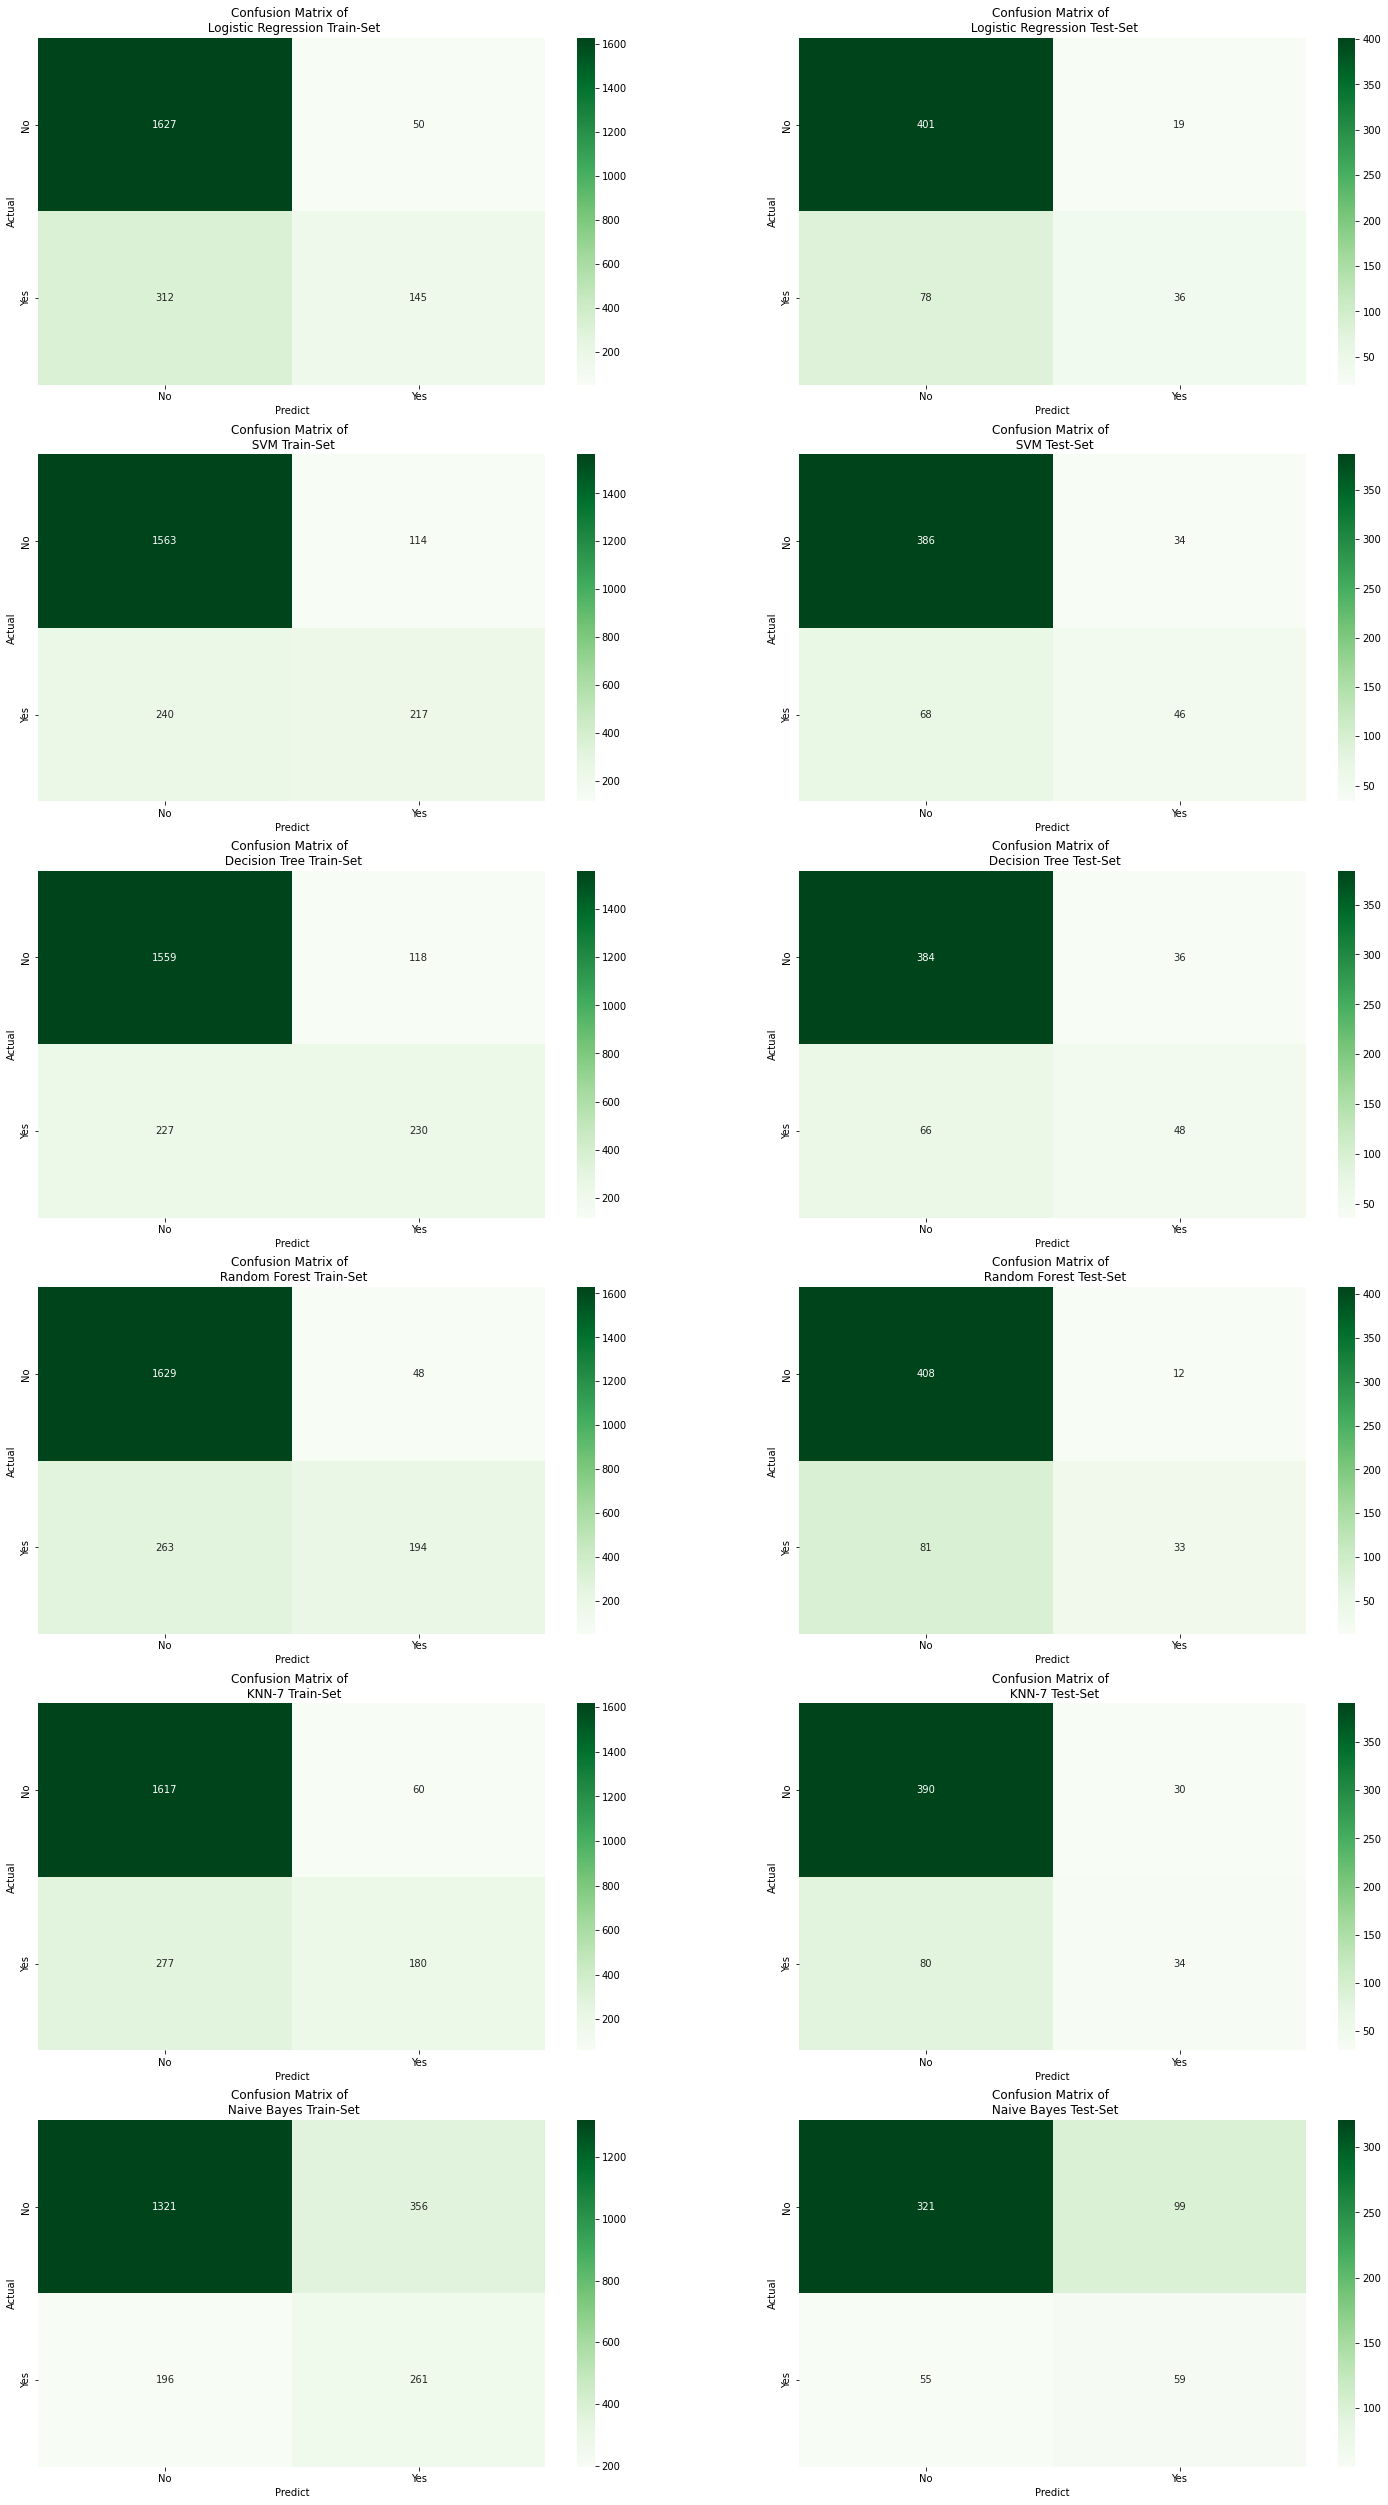

In [80]:
# Confusion Matrix Visualization Baseline for each model
# Define list of Algorithm
modelCM = [confusion_matrix(y_train, y_trainPredLogReg),
           confusion_matrix(y_test, y_testPredLogReg),
           confusion_matrix(y_train, y_trainPredSVMLin),
           confusion_matrix(y_test, y_testPredSVMLin),
           confusion_matrix(y_train, y_trainPredDecTree),
           confusion_matrix(y_test, y_testPredDecTree),
           confusion_matrix(y_train, y_trainPredRandFor),
           confusion_matrix(y_test, y_testPredRandFor),
           confusion_matrix(y_train, y_trainPredKnn7),
           confusion_matrix(y_test, y_testPredKnn7),
           confusion_matrix(y_train, y_trainPredNaiBay),
           confusion_matrix(y_test, y_testPredNaiBay)]
modelAlias = ['Logistic Regression Train-Set', 'Logistic Regression Test-Set',
              'SVM Train-Set', 'SVM Test-Set',
              'Decision Tree Train-Set', 'Decision Tree Test-Set', 
              'Random Forest Train-Set', 'Random Forest Test-Set', 
              'KNN-7 Train-Set', 'KNN-7 Test-Set', 
              'Naive Bayes Train-Set', 'Naive Bayes Test-Set']

# Confusion Matrix
plt.figure(figsize = (25, 60))
for i in range(len(modelCM)):
  plt.subplot(8, 2, i+1)
  fig = sns.heatmap(modelCM[i], annot = True, fmt = 'd', cmap='Greens')
  plt.title(f'Confusion Matrix of \n {modelAlias[i]}')
  fig.set_xticklabels(['No', 'Yes'])
  fig.set_yticklabels(['No', 'Yes'])
  plt.xlabel('Predict')
  plt.ylabel('Actual')
plt.show()

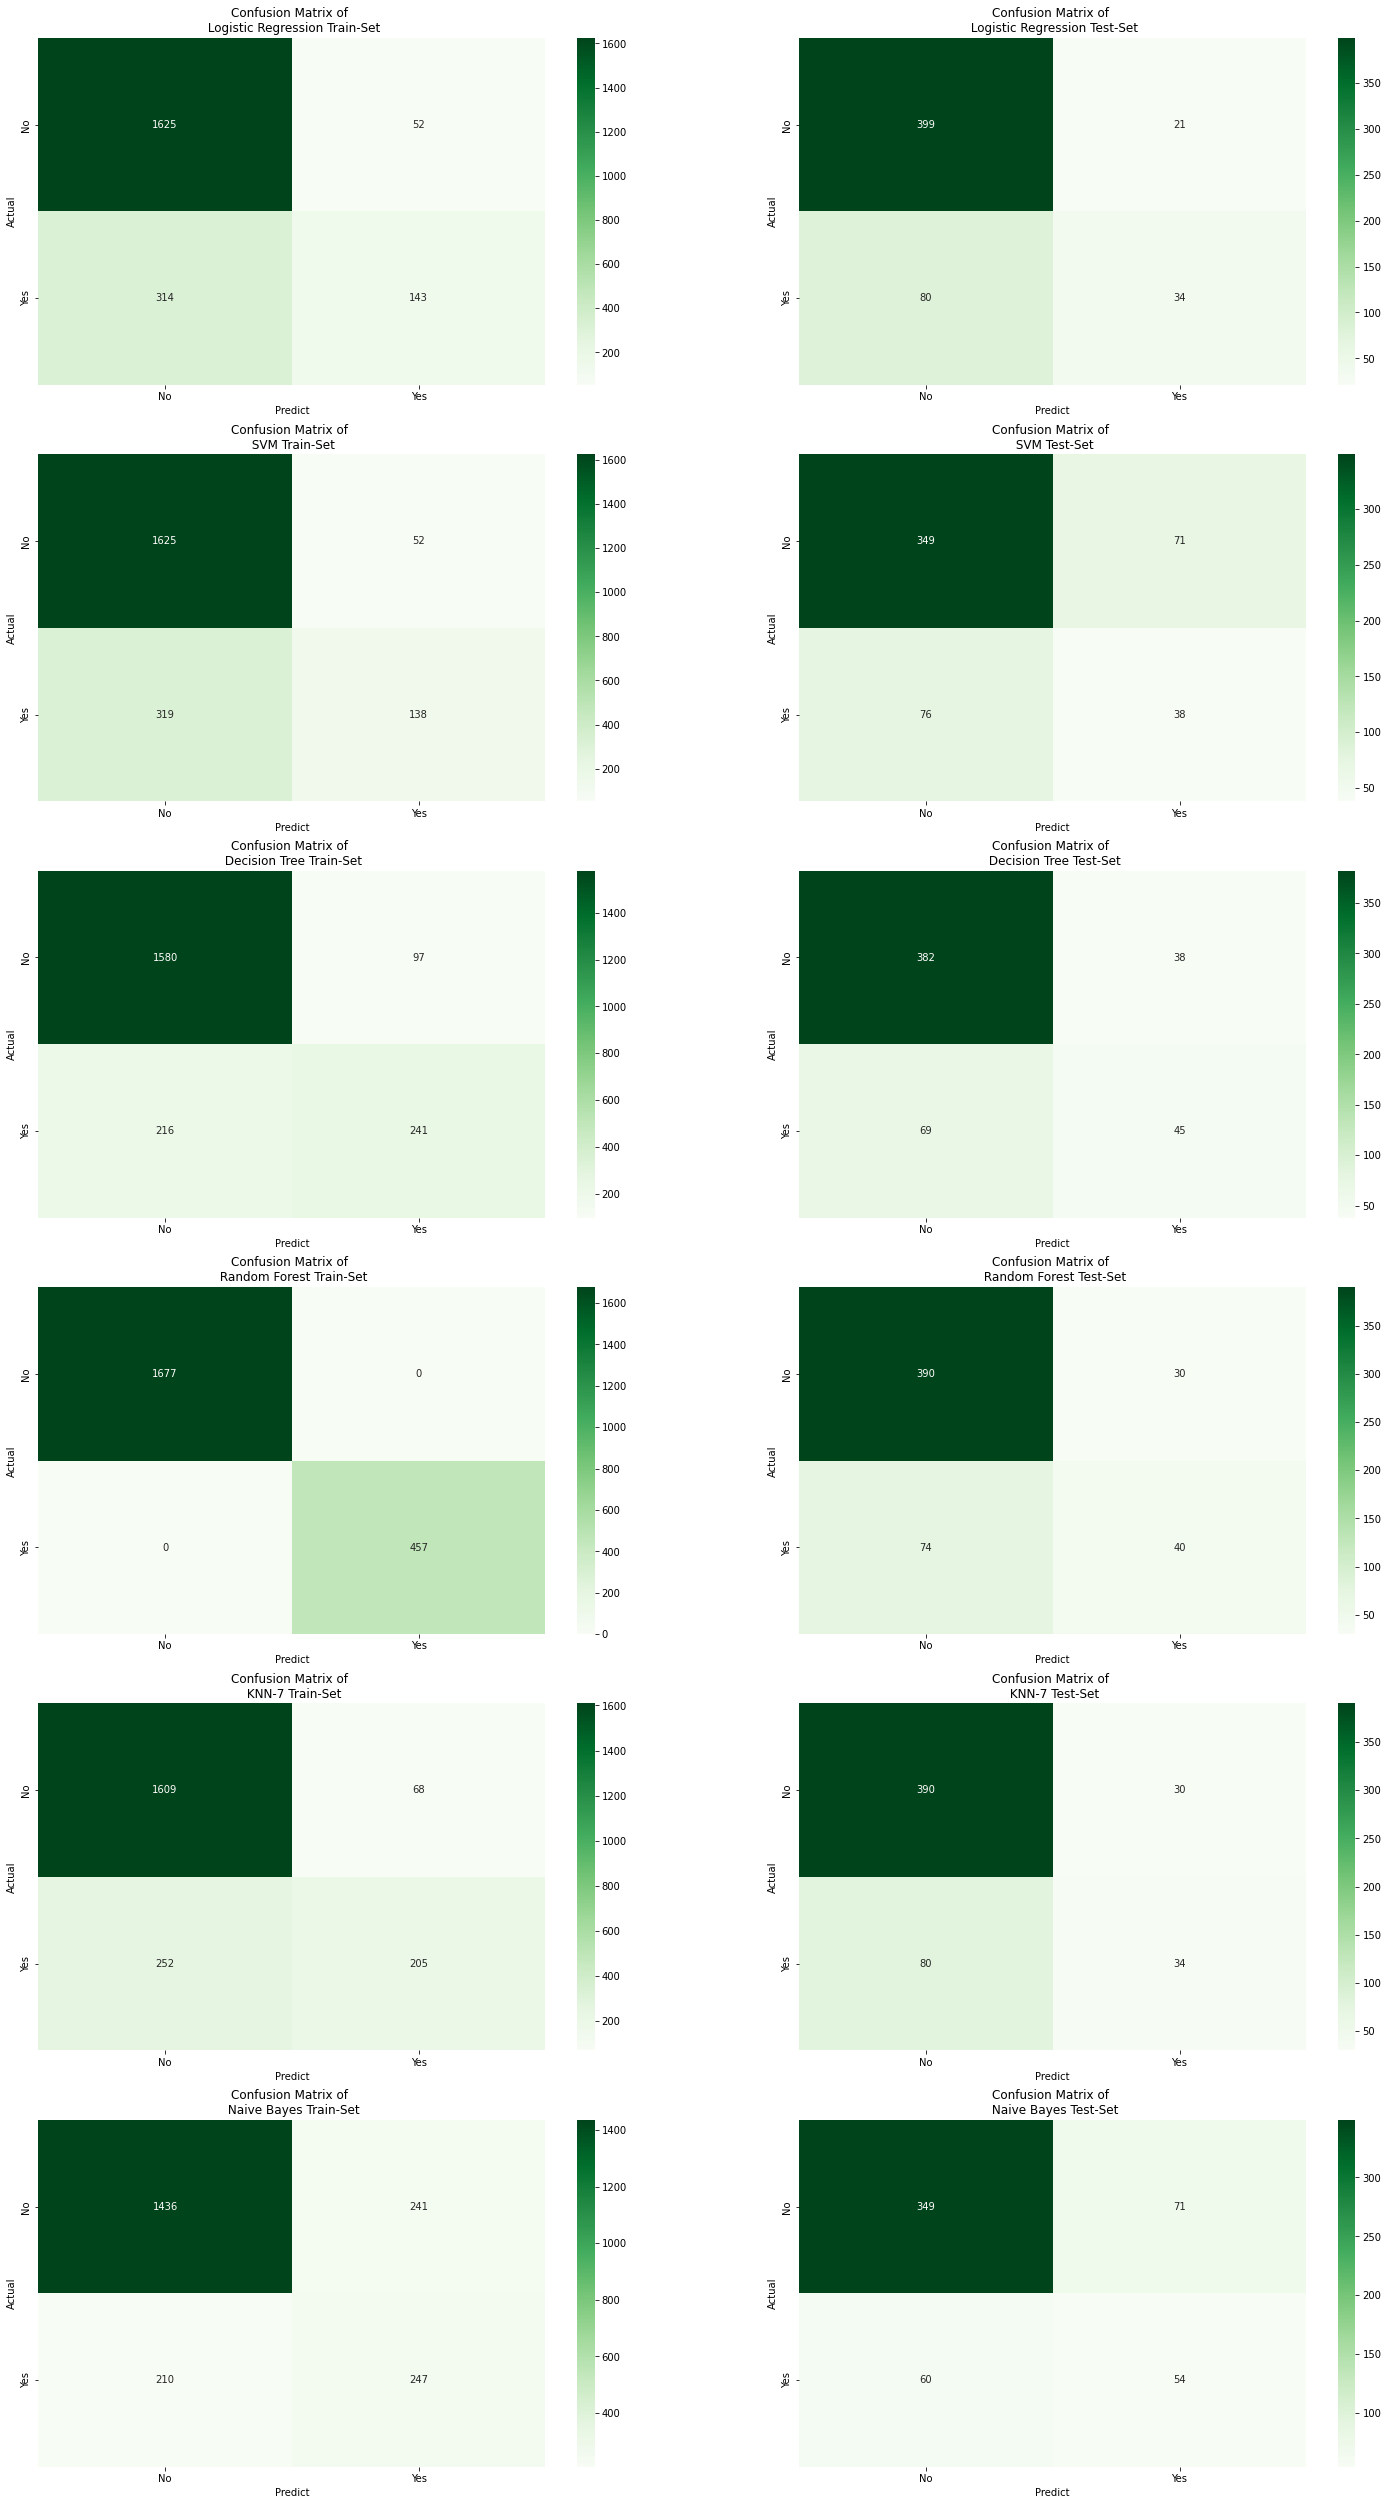

In [81]:
# Confusion Matrix Visualization Manual Search for each model
# Define list of Algorithm
modelCM = [confusion_matrix(y_train, y_trainPredLogRegMS),
           confusion_matrix(y_test, y_testPredLogRegMS),
           confusion_matrix(y_train, y_trainPredSVMMS),
           confusion_matrix(y_test, y_testPredSVMMS),
           confusion_matrix(y_train, y_trainPredDecTreeMS),
           confusion_matrix(y_test, y_testPredDecTreeMS),
           confusion_matrix(y_train, y_trainPredRandForMS),
           confusion_matrix(y_test, y_testPredRandForMS),
           confusion_matrix(y_train, y_trainPredKNNMS),
           confusion_matrix(y_test, y_testPredKNNMS),
           confusion_matrix(y_train, y_trainPredNaiBayMS),
           confusion_matrix(y_test, y_testPredNaiBayMS)]

modelAlias = ['Logistic Regression Train-Set', 'Logistic Regression Test-Set',
              'SVM Train-Set', 'SVM Test-Set',
              'Decision Tree Train-Set', 'Decision Tree Test-Set', 
              'Random Forest Train-Set', 'Random Forest Test-Set', 
              'KNN-7 Train-Set', 'KNN-7 Test-Set', 
              'Naive Bayes Train-Set', 'Naive Bayes Test-Set']

# Confusion Matrix
plt.figure(figsize = (25, 60))
for i in range(len(modelCM)):
  plt.subplot(8, 2, i+1)
  fig = sns.heatmap(modelCM[i], annot = True, fmt = 'd', cmap='Greens')
  plt.title(f'Confusion Matrix of \n {modelAlias[i]}')
  fig.set_xticklabels(['No', 'Yes'])
  fig.set_yticklabels(['No', 'Yes'])
  plt.xlabel('Predict')
  plt.ylabel('Actual')
plt.show()

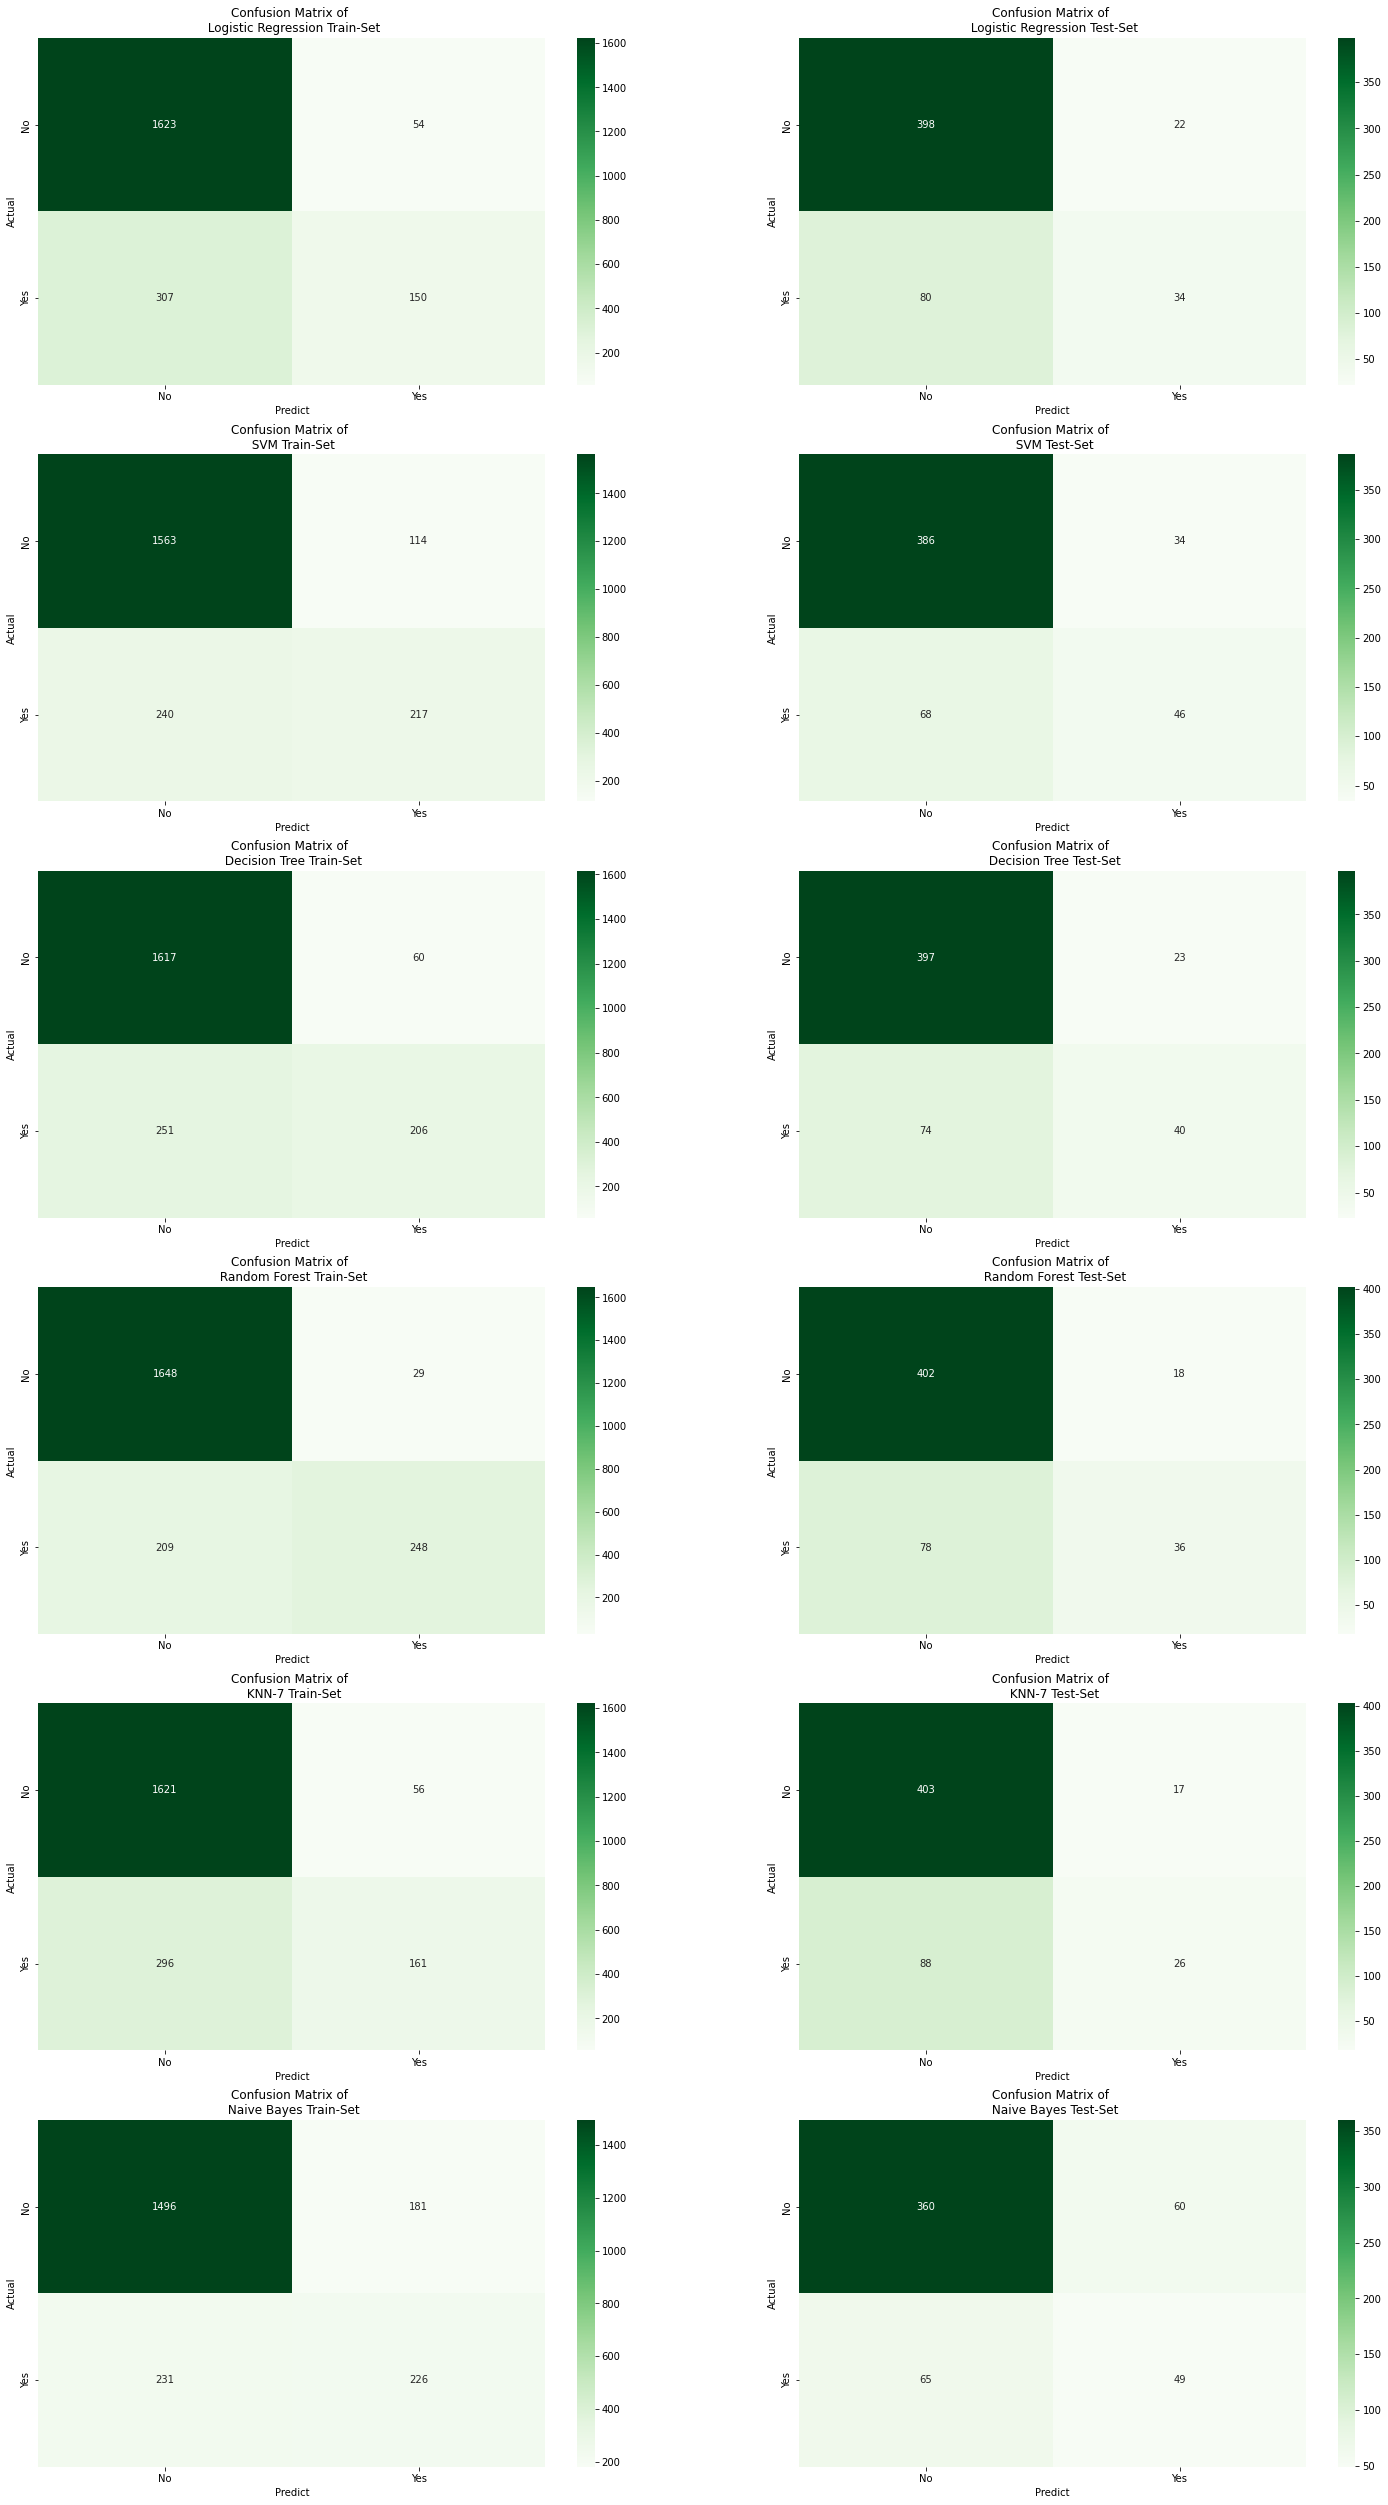

In [82]:
# Confusion Matrix Visualization Random Search for each model
# Define list of Algorithm
modelCM = [confusion_matrix(y_train, y_trainPredLogRegRS),
           confusion_matrix(y_test, y_testPredBestLogRegRS),
           confusion_matrix(y_train, y_trainPredSVMRS),
           confusion_matrix(y_test, y_testPredBestSVMRS),
           confusion_matrix(y_train, y_trainPredDecTreeRS),
           confusion_matrix(y_test, y_testPredBestDecTreeRS),
           confusion_matrix(y_train, y_trainPredRandForRS),
           confusion_matrix(y_test, y_testPredBestRandForRS),
           confusion_matrix(y_train, y_trainPredKNNRS),
           confusion_matrix(y_test, y_testPredBestKNNRS),
           confusion_matrix(y_train, y_trainPredNaiBayRS),
           confusion_matrix(y_test, y_testPredBestNaiBayRS)]

modelAlias = ['Logistic Regression Train-Set', 'Logistic Regression Test-Set',
              'SVM Train-Set', 'SVM Test-Set',
              'Decision Tree Train-Set', 'Decision Tree Test-Set', 
              'Random Forest Train-Set', 'Random Forest Test-Set', 
              'KNN-7 Train-Set', 'KNN-7 Test-Set', 
              'Naive Bayes Train-Set', 'Naive Bayes Test-Set']

# Confusion Matrix
plt.figure(figsize = (25, 60))
for i in range(len(modelCM)):
  plt.subplot(8, 2, i+1)
  fig = sns.heatmap(modelCM[i], annot = True, fmt = 'd', cmap='Greens')
  plt.title(f'Confusion Matrix of \n {modelAlias[i]}')
  fig.set_xticklabels(['No', 'Yes'])
  fig.set_yticklabels(['No', 'Yes'])
  plt.xlabel('Predict')
  plt.ylabel('Actual')
plt.show()

# **10 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [84]:
infData = dfTest
infData

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
266,480000,2,1,1,43,0,0,0,0,0,...,294000,300000,3493,5647,5792,5880,6000,3493,21308,0
689,100000,2,2,2,32,0,0,0,0,0,...,98259,80849,81151,3481,6006,3246,2994,2903,2849,0
1603,200000,2,2,1,35,1,-1,-1,2,0,...,769,453,137,7970,1100,0,0,0,0,0
2945,110000,2,2,2,36,1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0
2435,110000,2,3,2,31,0,0,-1,-1,-1,...,2500,2500,0,1205,2487,2700,2500,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,30000,1,2,1,32,-2,-2,-2,-2,-2,...,5930,4192,0,6367,2115,5933,4192,0,0,0
435,240000,1,2,1,36,0,0,0,0,0,...,239410,184094,101776,9700,8500,12036,8300,5000,5000,0
42,200000,1,1,2,26,0,0,0,0,0,...,23858,33236,33337,5023,4007,5001,10020,5073,5064,0
1421,80000,1,2,1,53,2,2,2,2,0,...,9546,9890,10479,2600,1200,0,503,900,0,1


# **11 - Conceptual Problems**


---



Jawab pertanyaan berikut:

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
  - *Criterion* adalah sebuah parameter yang digunakan dalam pembuatan decision tree untuk menentukan bagaimana suatu node dibagi menjadi sub-node. Ada beberapa jenis criterion yang dapat digunakan, di antaranya adalah Gini index dan information gain. Gini index digunakan untuk mengukur puretas suatu node, sedangkan information gain digunakan untuk mengukur seberapa banyak informasi yang dapat diperoleh dari suatu pembagian node.
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
  - Cross validation adalah metode untuk mengevaluasi kinerja dari suatu model dengan menggunakan data yang berbeda sebagai data train dan data validasi
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

# **12 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.